In [2]:
import pandas as pd
import numpy as np

#import data
total_data2024 = pd.read_excel("../data/raw/all_alpha_24.xlsx")
total_data2023 = pd.read_excel("../data/raw/all_alpha_23.xlsx")
total_data2022 = pd.read_excel("../data/raw/all_alpha_22.xlsx")
total_data2021 = pd.read_excel("../data/raw/all_alpha_21.xlsx")
total_data2020 = pd.read_excel("../data/raw/all_alpha_20.xlsx")
total_data2019 = pd.read_excel("../data/raw/all_alpha_19.xlsx")
total_data2018 = pd.read_excel("../data/raw/all_alpha_18.xlsx")
total_data2017 = pd.read_excel("../data/raw/all_alpha_17.xlsx")
total_data2016 = pd.read_excel("../data/raw/all_alpha_16.xlsx")
total_data2015 = pd.read_excel("../data/raw/all_alpha_15.xlsx")
total_data2014 = pd.read_excel("../data/raw/all_alpha_14.xlsx")
total_data2013 = pd.read_excel("../data/raw/all_alpha_13.xlsx")
total_data2012 = pd.read_excel("../data/raw/all_alpha_12.xlsx")
total_data2011 = pd.read_excel("../data/raw/all_alpha_11.xlsx")
total_data2010 = pd.read_excel("../data/raw/all_alpha_10.xls")
total_data2009 = pd.read_excel("../data/raw/all_alpha_09.xls")
total_data2008 = pd.read_excel("../data/raw/all_alpha_08.xls")
total_data2007 = pd.read_excel("../data/raw/all_alpha_07.xls")
total_data2006 = pd.read_excel("../data/raw/all_alpha_06.xls")
total_data2005 = pd.read_excel("../data/raw/all_alpha_05.xls")
total_data2004 = pd.read_excel("../data/raw/all_alpha_04.xls")
total_data2003 = pd.read_excel("../data/raw/all_alpha_03.xls")
total_data2002 = pd.read_excel("../data/raw/all_alpha_02.xls")
total_data2001 = pd.read_excel("../data/raw/all_alpha_01.xls")
total_data2000 = pd.read_excel("../data/raw/all_alpha_00 (1).xls")


In [3]:
#Add year to each data set as a column

total_data2024['Year'] = 2024
total_data2023['Year'] = 2023
total_data2022['Year'] = 2022
total_data2021['Year'] = 2021
total_data2020['Year'] = 2020
total_data2019['Year'] = 2019
total_data2018['Year'] = 2018
total_data2017['Year'] = 2017
total_data2016['Year'] = 2016
total_data2015['Year'] = 2015
total_data2014['Year'] = 2014
total_data2013['Year'] = 2013
total_data2012['Year'] = 2012
total_data2011['Year'] = 2011
total_data2010['Year'] = 2010
total_data2009['Year'] = 2009
total_data2008['Year'] = 2008
total_data2007['Year'] = 2007
total_data2006['Year'] = 2006
total_data2005['Year'] = 2005
total_data2004['Year'] = 2004
total_data2003['Year'] = 2003
total_data2002['Year'] = 2002
total_data2001['Year'] = 2001
total_data2000['Year'] = 2000

In [4]:
#merge all datasets into one
merged_data = pd.concat([total_data2024, total_data2023, total_data2022, total_data2021, total_data2020, 
                         total_data2019, total_data2018, total_data2017, total_data2016, total_data2015, 
                         total_data2014, total_data2013, total_data2012, total_data2011, total_data2010, 
                         total_data2009, total_data2008, total_data2007, total_data2006, total_data2005, 
                         total_data2004, total_data2003, total_data2002, total_data2001, total_data2000], ignore_index=True)

In [5]:
# Drop rows containing 'N/A*'
merged_data = merged_data[~merged_data['City MPG'].astype(str).str.contains('N/A*')]

In [6]:
# Drop rows containing 'nan'
merged_data = merged_data[~merged_data['City MPG'].astype(str).str.contains('nan')]

In [7]:
# Convert "Air Pollution Score" column to string type
merged_data["Air Pollution Score"] = merged_data["Air Pollution Score"].astype(str)

In [8]:
#one row has Gasoline/Electricity and its values flipped (Ie 90/35 instead of 35/90), 
#this fixes that for the 'Fuel', 'City MPG', "Hwy MPG', and 'Cmb MPG'
def reverse_mpg_values(df):
    # Filter rows where Fuel is 'Electricity/Gasoline'
    filter_condition = df['Fuel'] == 'Electricity/Gasoline'
    filtered_df = df[filter_condition].copy()

    # Change 'Electricity/Gasoline' to 'Gasoline/Electricity'
    filtered_df.loc[:, 'Fuel'] = 'Gasoline/Electricity'

    # Check if columns exist before splitting
    if 'City MPG' in filtered_df.columns:
        # Reverse the 'City MPG' values
        filtered_df[['Gasoline_City_MPG', 'Electricity_City_MPG']] = filtered_df['City MPG'].str.split('/', expand=True)
        filtered_df['City MPG'] = filtered_df['Electricity_City_MPG'] + '/' + filtered_df['Gasoline_City_MPG']

    if 'Hwy MPG' in filtered_df.columns:
        # Reverse the 'Hwy MPG' values
        filtered_df[['Gasoline_Hwy_MPG', 'Electricity_Hwy_MPG']] = filtered_df['Hwy MPG'].str.split('/', expand=True)
        filtered_df['Hwy MPG'] = filtered_df['Electricity_Hwy_MPG'] + '/' + filtered_df['Gasoline_Hwy_MPG']

    if 'Cmb MPG' in filtered_df.columns:
        # Reverse the 'Cmb MPG' values
        filtered_df[['Gasoline_Cmb_MPG', 'Electricity_Cmb_MPG']] = filtered_df['Cmb MPG'].str.split('/', expand=True)
        filtered_df['Cmb MPG'] = filtered_df['Electricity_Cmb_MPG'] + '/' + filtered_df['Gasoline_Cmb_MPG']

    # Drop unnecessary columns
    columns_to_drop = ['Gasoline_City_MPG', 'Electricity_City_MPG', 'Gasoline_Hwy_MPG', 'Electricity_Hwy_MPG', 
                       'Gasoline_Cmb_MPG', 'Electricity_Cmb_MPG']
    filtered_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

    # Update the original DataFrame with the modified values
    df.update(filtered_df)

    return df

# Call the function on your merged_data DataFrame
merged_data = reverse_mpg_values(merged_data)

In [9]:
#Fix names in 'Fuel' column to conform to a naming convention
merged_data['Fuel'] = merged_data['Fuel'].replace('Gasoline/Electricty', 'Gasoline/Electricity')
merged_data['Fuel'] = merged_data['Fuel'].replace('ethanol', 'Ethanol')
merged_data['Fuel'] = merged_data['Fuel'].replace('diesel', 'Diesel')
merged_data['Fuel'] = merged_data['Fuel'].replace('ethanol/gas', 'Ethanol/Gas')
merged_data['Fuel'] = merged_data['Fuel'].replace('Ethanol/Gas', 'Ethanol/Gasoline')
merged_data['Fuel'] = merged_data['Fuel'].replace('CNG/gas', 'CNG/Gasoline')

In [10]:
merged_data["Fuel"].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Electricity', 'Diesel',
       'Ethanol/Gasoline', 'Hydrogen', 'Ethanol', 'CNG/Gasoline', 'CNG'],
      dtype=object)

In [11]:
#drop duplicates, ignoring the specified columns
merged_data.drop_duplicates(subset=merged_data.columns.difference(['Cert Region', 'Stnd', 'Stnd Description', 'Sales Area']), inplace=True)

In [12]:
#split MODEL column into CAR_MAKE and CAR_MODEL

def split_model(row):
    if 'ASTON MARTIN' in row['Model']:
        return 'ASTON MARTIN', row['Model'].replace('ASTON MARTIN ', '')
    elif 'LAND ROVER' in row['Model']:
        return 'LAND ROVER', row['Model'].replace('LAND ROVER ', '')
    elif 'ALFA ROMEO' in row['Model']:
        return 'ALFA ROMEO', row['Model'].replace('ALFA ROMEO ', '')
    elif 'VEHICLE PRODUCTION GROUP' in row['Model']:
        return 'VEHICLE PRODUCTION GROUP', row['Model'].replace('VEHICLE PRODUCTION GROUP ', '')
    else:
        return row['Model'].split(maxsplit=1)
    
#apply function split_model
merged_data[['Car_Make', 'Car_Model']] = merged_data.apply(split_model, axis=1, result_type='expand')



In [13]:
#columns to remove before pipeline

columns_to_remove = ['Model', 
                     'Cert Region', 
                     'Comb CO2', 
                     'Stnd', 
                     'Stnd Description', 
                     'Underhood ID',  
                     'Sales Area', 
                     'FE Calc Appr', 
                     'Unadj Cmb MPG', 
                     'Comb CO2',
                     'SmartWay']

for column in columns_to_remove:
    try:
        merged_data = merged_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")


Column Comb CO2 was already removed.


In [14]:
#for cylinders, since electric cars don't have cylinders, we replace the nan value with their fuel type of Electric
def handle_nan(row):
    if pd.isna(row['Cyl']):
        return row['Fuel']  # If NaN, copy value from 'Fuel' column
    else:
        return row['Cyl']  # Return the original value if not NaN

In [15]:
#fix naming conventions of cyl column
def convert_cyl(row):
    if row['Cyl'] == '(6 cyl)':
        return 6.0
    elif row['Cyl'] == '(4 cyl)':
        return 4.0
    elif row['Cyl'] == '(12 cyl)':
        return 12.0
    elif row['Cyl'] == '(8 cyl)':
        return 8.0
    elif row['Cyl'] == '(10 cyl)':
        return 10.0
    elif row['Cyl'] == '(16 cyl)':
        return 16.0
    elif row['Cyl'] == '(5 cyl)':
        return 5.0
    elif row['Cyl'] == '(2 cyl)':
        return 2.0
    elif row['Cyl'] == '(3 cyl)':
        return 3.0
    else:
        return row['Cyl']
    
merged_data['Cyl'] = merged_data.apply(convert_cyl, axis=1)

In [16]:
def calculate_average(value):
    if pd.isna(value):  # Check if value is NaN
        return np.nan  # Return NaN if value is NaN
    if isinstance(value, str) and '/' in value:
        nums = [float(num) for num in value.split('/') if num.isdigit()]
        if len(nums) == 0:
            return np.nan  # Return NaN if no numeric values are found
        return sum(nums) / len(nums)
    elif isinstance(value, int) or isinstance(value, float):
        return float(value)  # Return value if it's already numeric
    else:
        return value  # Return NaN for non-numeric values

In [17]:
merged_data['Air Pollution Score'] = merged_data['Air Pollution Score'].apply(calculate_average)
merged_data['Greenhouse Gas Score'] = merged_data['Greenhouse Gas Score'].apply(calculate_average)


In [18]:
def split_fuel_records(df):
    new_rows = []
    for index, row in df.iterrows():
        fuel = row['Fuel']
        city_mpg = row['City MPG']

        # Initialize IsHybrid column with default value
        row['IsHybrid'] = 'Not Hybrid'

        # Update IsHybrid based on fuel type
        if fuel == 'Gasoline/Electricity':
            row['IsHybrid'] = 'Electric Hybrid'
        elif fuel == 'Ethanol/Gasoline':
            row['IsHybrid'] = 'Ethanol Hybrid'

        if ('/' in fuel) and ('/' in city_mpg):
            fuels = fuel.split('/')
            city_mpgs = city_mpg.split('/')
            for i, fuel_type in enumerate(fuels):
                new_row = row.copy()
                new_row['Fuel'] = fuel_type.strip()
                new_row['City MPG'] = city_mpgs[i].strip()
                new_rows.append(new_row)
        else:
            new_rows.append(row)
    return pd.DataFrame(new_rows)

In [19]:
merged_data = split_fuel_records(merged_data).reset_index(drop=True)

In [20]:
nan_count_per_column = {col: merged_data[col].astype(str).str.count('nan').sum() for col in merged_data.columns}

print("Count of occurrences of 'nan' in each column:")
for col, count in nan_count_per_column.items():
    print(f"{col}: {count}")

Count of occurrences of 'nan' in each column:
Displ: 803
Cyl: 807
Trans: 0
Drive: 0
Fuel: 0
Veh Class: 0
Air Pollution Score: 25
City MPG: 0
Hwy MPG: 0
Cmb MPG: 0
Greenhouse Gas Score: 0
Year: 0
Car_Make: 0
Car_Model: 11
IsHybrid: 0


In [21]:
na_count_per_column = {col: merged_data[col].astype(str).str.count('N/A*').sum() for col in merged_data.columns}

print("Count of occurrences of 'N/A*' in each column:")
for col, count in na_count_per_column.items():
    print(f"{col}: {count}")

Count of occurrences of 'N/A*' in each column:
Displ: 0
Cyl: 0
Trans: 0
Drive: 0
Fuel: 0
Veh Class: 0
Air Pollution Score: 0
City MPG: 0
Hwy MPG: 0
Cmb MPG: 0
Greenhouse Gas Score: 0
Year: 0
Car_Make: 0
Car_Model: 0
IsHybrid: 0


In [22]:
merged_data.dtypes

Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Veh Class                object
Air Pollution Score      object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score     object
Year                      int64
Car_Make                 object
Car_Model                object
IsHybrid                 object
dtype: object

In [23]:
# Assuming merged_data is your DataFrame and 'Column_Name' is the column you want to convert to float
column_name = 'City MPG'

# Before converting, ensure there are no non-numeric values
# If the column has non-numeric values (like strings), you need to handle or clean them first

# Convert the column to float
merged_data[column_name] = merged_data[column_name].astype(float)

In [24]:
def get_parent_company(car_make):
    parent_company_mapping = {
        'Ford': 'Ford',
        'Lincoln': 'Ford',
        'Genesis': 'Hyundai',
        'Kia': 'Hyundai',
        'Hyundai': 'Hyundai',
        'Toyota': 'Toyota',
        'Lexus': 'Toyota',
        'Daihatsu': 'Toyota',
        'Chevrolet': 'GM',
        'Holden': 'GM',
        'Vauxhall': 'GM',
        'Cadillac': 'GM',
        'Opel': 'GM',
        'GMC': 'GM',
        'GM': 'GM',
        'Buick': 'GM',

    }
    return parent_company_mapping.get(car_make, "Unknown")

# Test the function
car_makes = ['Ford', 'Lincoln', 'Genesis', 'Kia', 'Hyundai', 'Toyota', 'Lexus', 'Daihatsu', 'Chevrolet', 'Holden', 'Vauxhall', 'Cadillac', 'Opel', 'GMC']
for car_make in car_makes:
    print(f"{car_make}: {get_parent_company(car_make)}")

Ford: Ford
Lincoln: Ford
Genesis: Hyundai
Kia: Hyundai
Hyundai: Hyundai
Toyota: Toyota
Lexus: Toyota
Daihatsu: Toyota
Chevrolet: GM
Holden: GM
Vauxhall: GM
Cadillac: GM
Opel: GM
GMC: GM


In [25]:
#save cleaned data and merged data to CSV
merged_data.to_csv('../data/processed/merged_data.csv', index=False)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

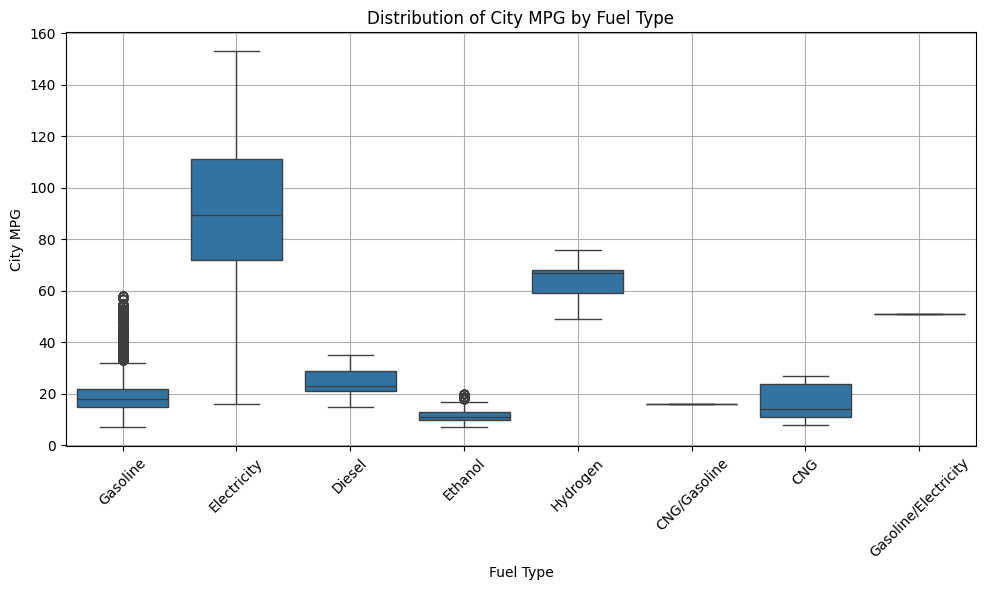

In [27]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Fuel', y='City MPG')
plt.title('Distribution of City MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

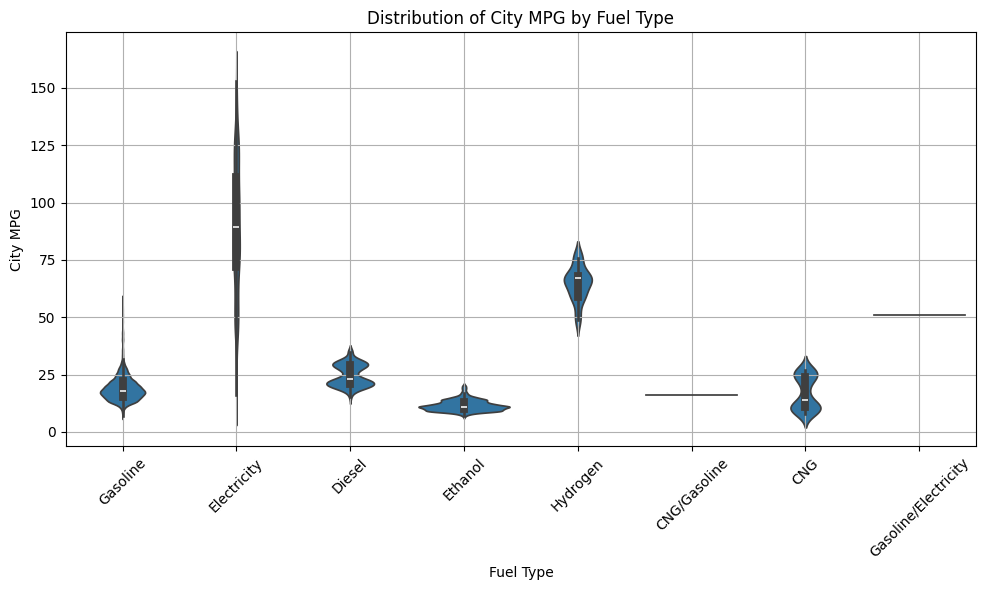

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x='Fuel', y='City MPG')
plt.title('Distribution of City MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

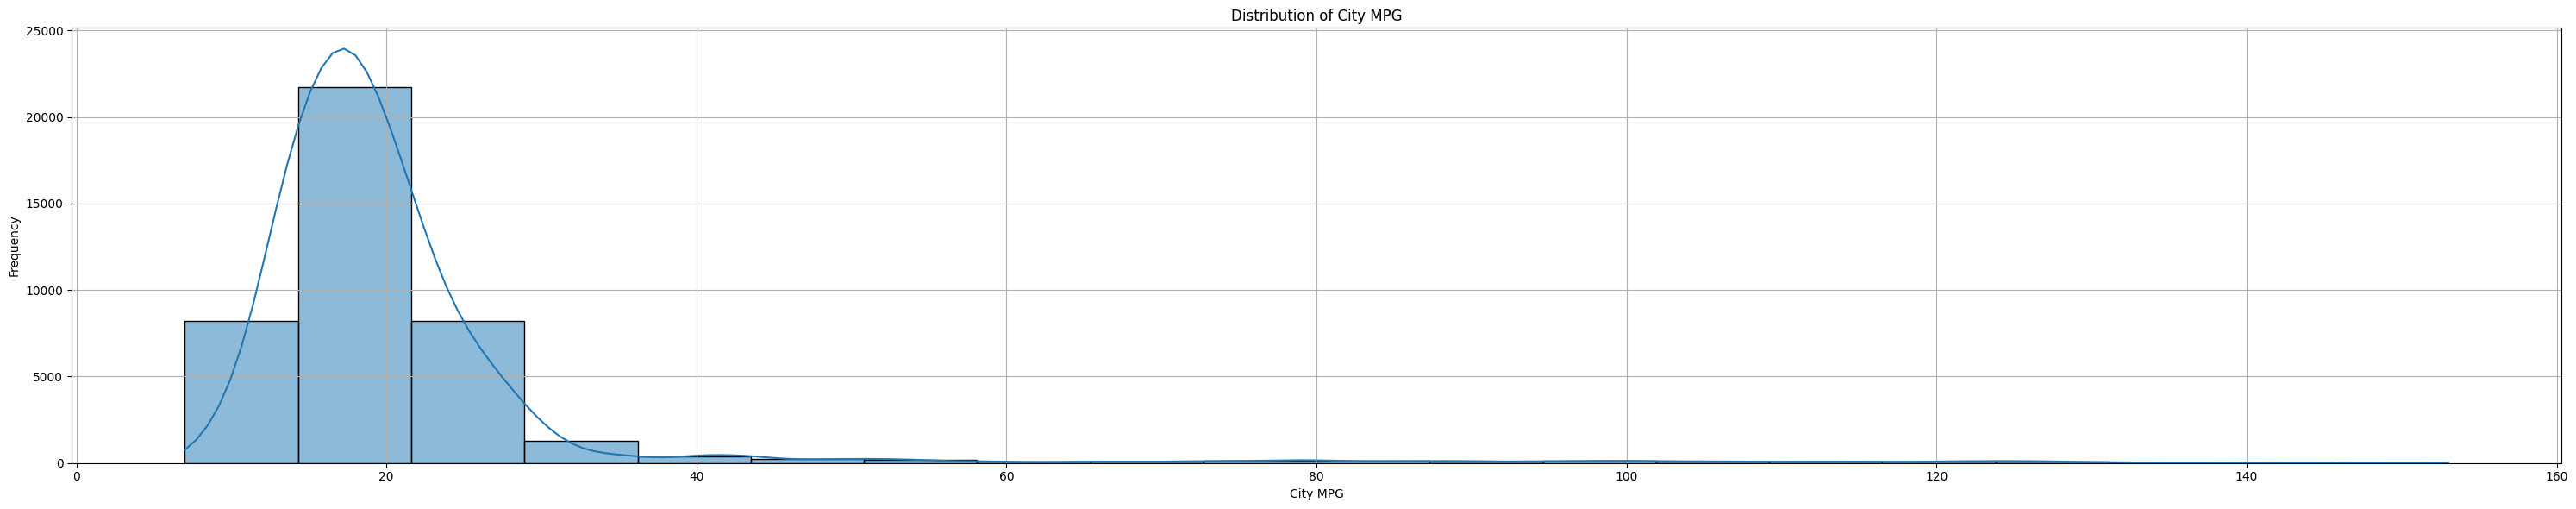

In [29]:
# Create the histogram
plt.figure(figsize=(30, 6))
sns.histplot(data=merged_data, x='City MPG', bins=20, kde=True)
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

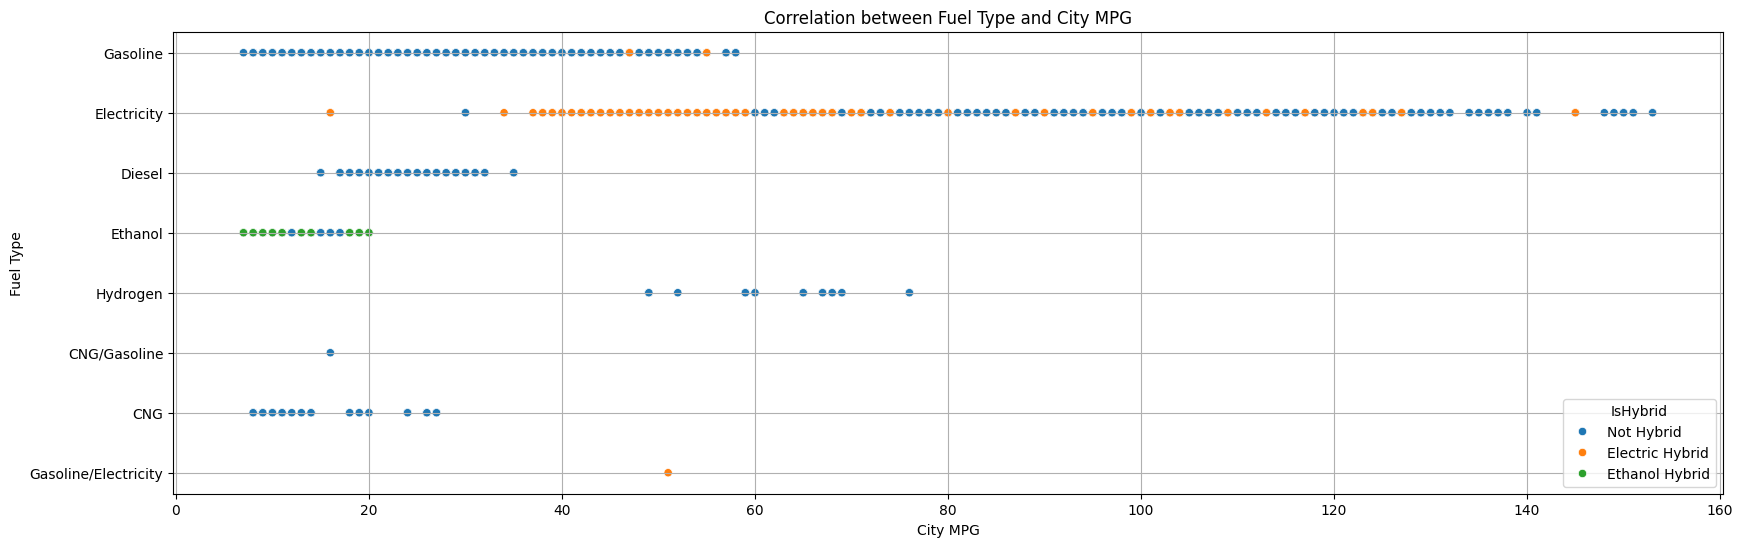

In [30]:

# Create the scatter plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=merged_data, x='City MPG', y='Fuel', hue='IsHybrid')
plt.title('Correlation between Fuel Type and City MPG')
plt.xlabel('City MPG')
plt.ylabel('Fuel Type')
plt.grid(True)

# Show the plot
plt.show()

In [31]:
# Filter the DataFrame
gasoline_electricity_rows = merged_data[merged_data['Fuel'] == 'Gasoline/Electricity']

# Print the filtered rows
print("Rows where Fuel is 'Gasoline/Electricity':")
print(gasoline_electricity_rows)

Rows where Fuel is 'Gasoline/Electricity':
       Displ  Cyl Trans Drive                  Fuel    Veh Class  \
20289    1.8  4.0   CVT   2WD  Gasoline/Electricity  midsize car   

      Air Pollution Score  City MPG Hwy MPG Cmb MPG Greenhouse Gas Score  \
20289                   9      51.0      49      50                   10   

       Year Car_Make             Car_Model         IsHybrid  
20289  2013   TOYOTA  Prius Plug-in Hybrid  Electric Hybrid  


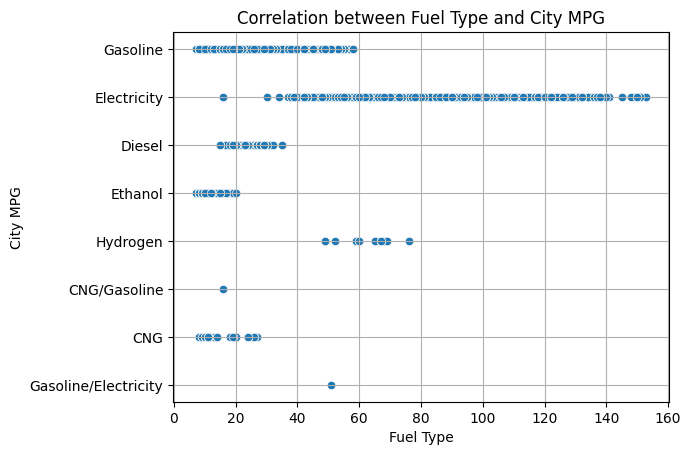

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
sns.scatterplot(data=merged_data, x='City MPG', y='Fuel')
plt.title('Correlation between Fuel Type and City MPG')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.grid(True)

# Show the plot
plt.show()

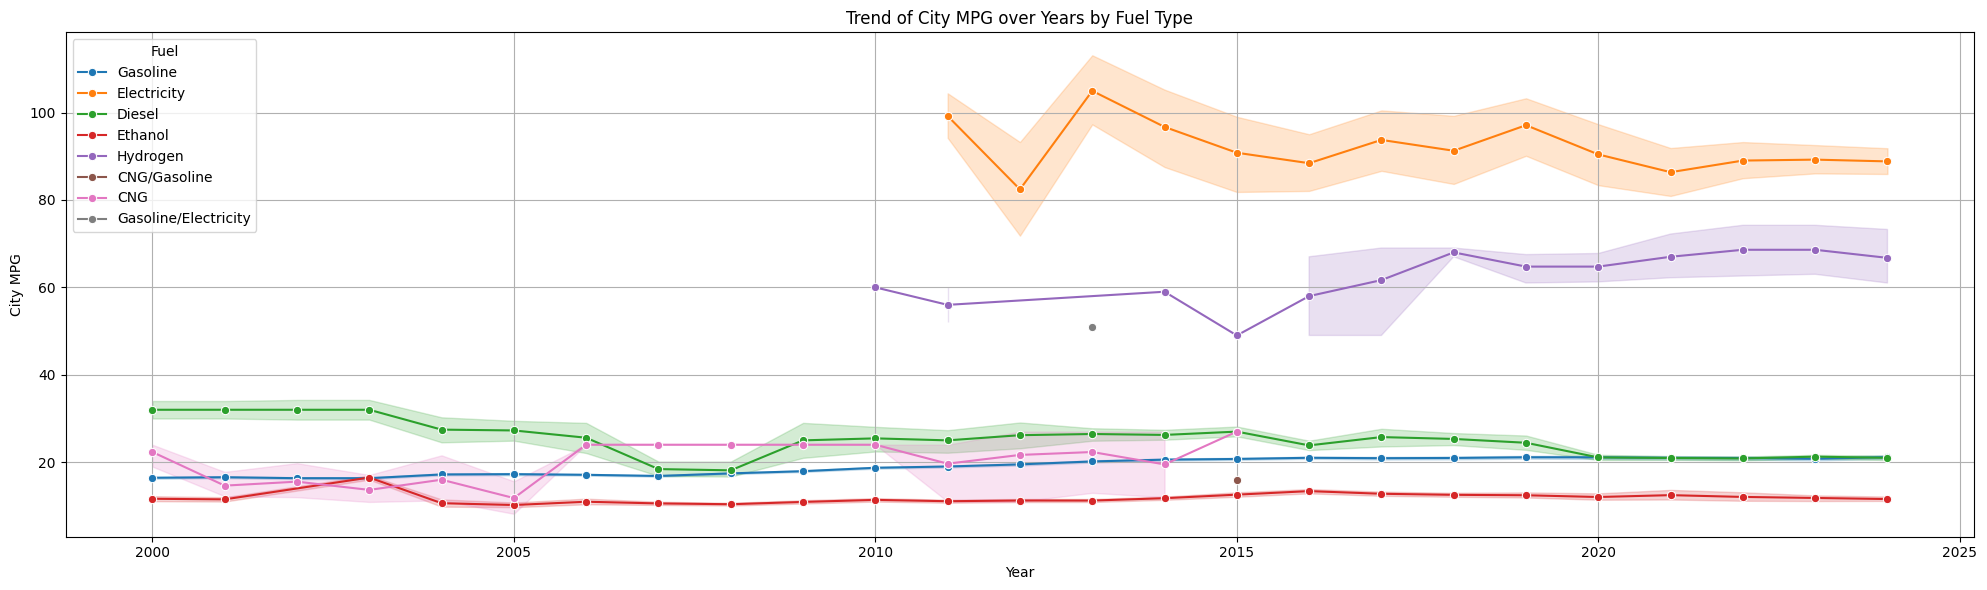

In [33]:
# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=merged_data, x='Year', y='City MPG', hue='Fuel', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Fuel')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

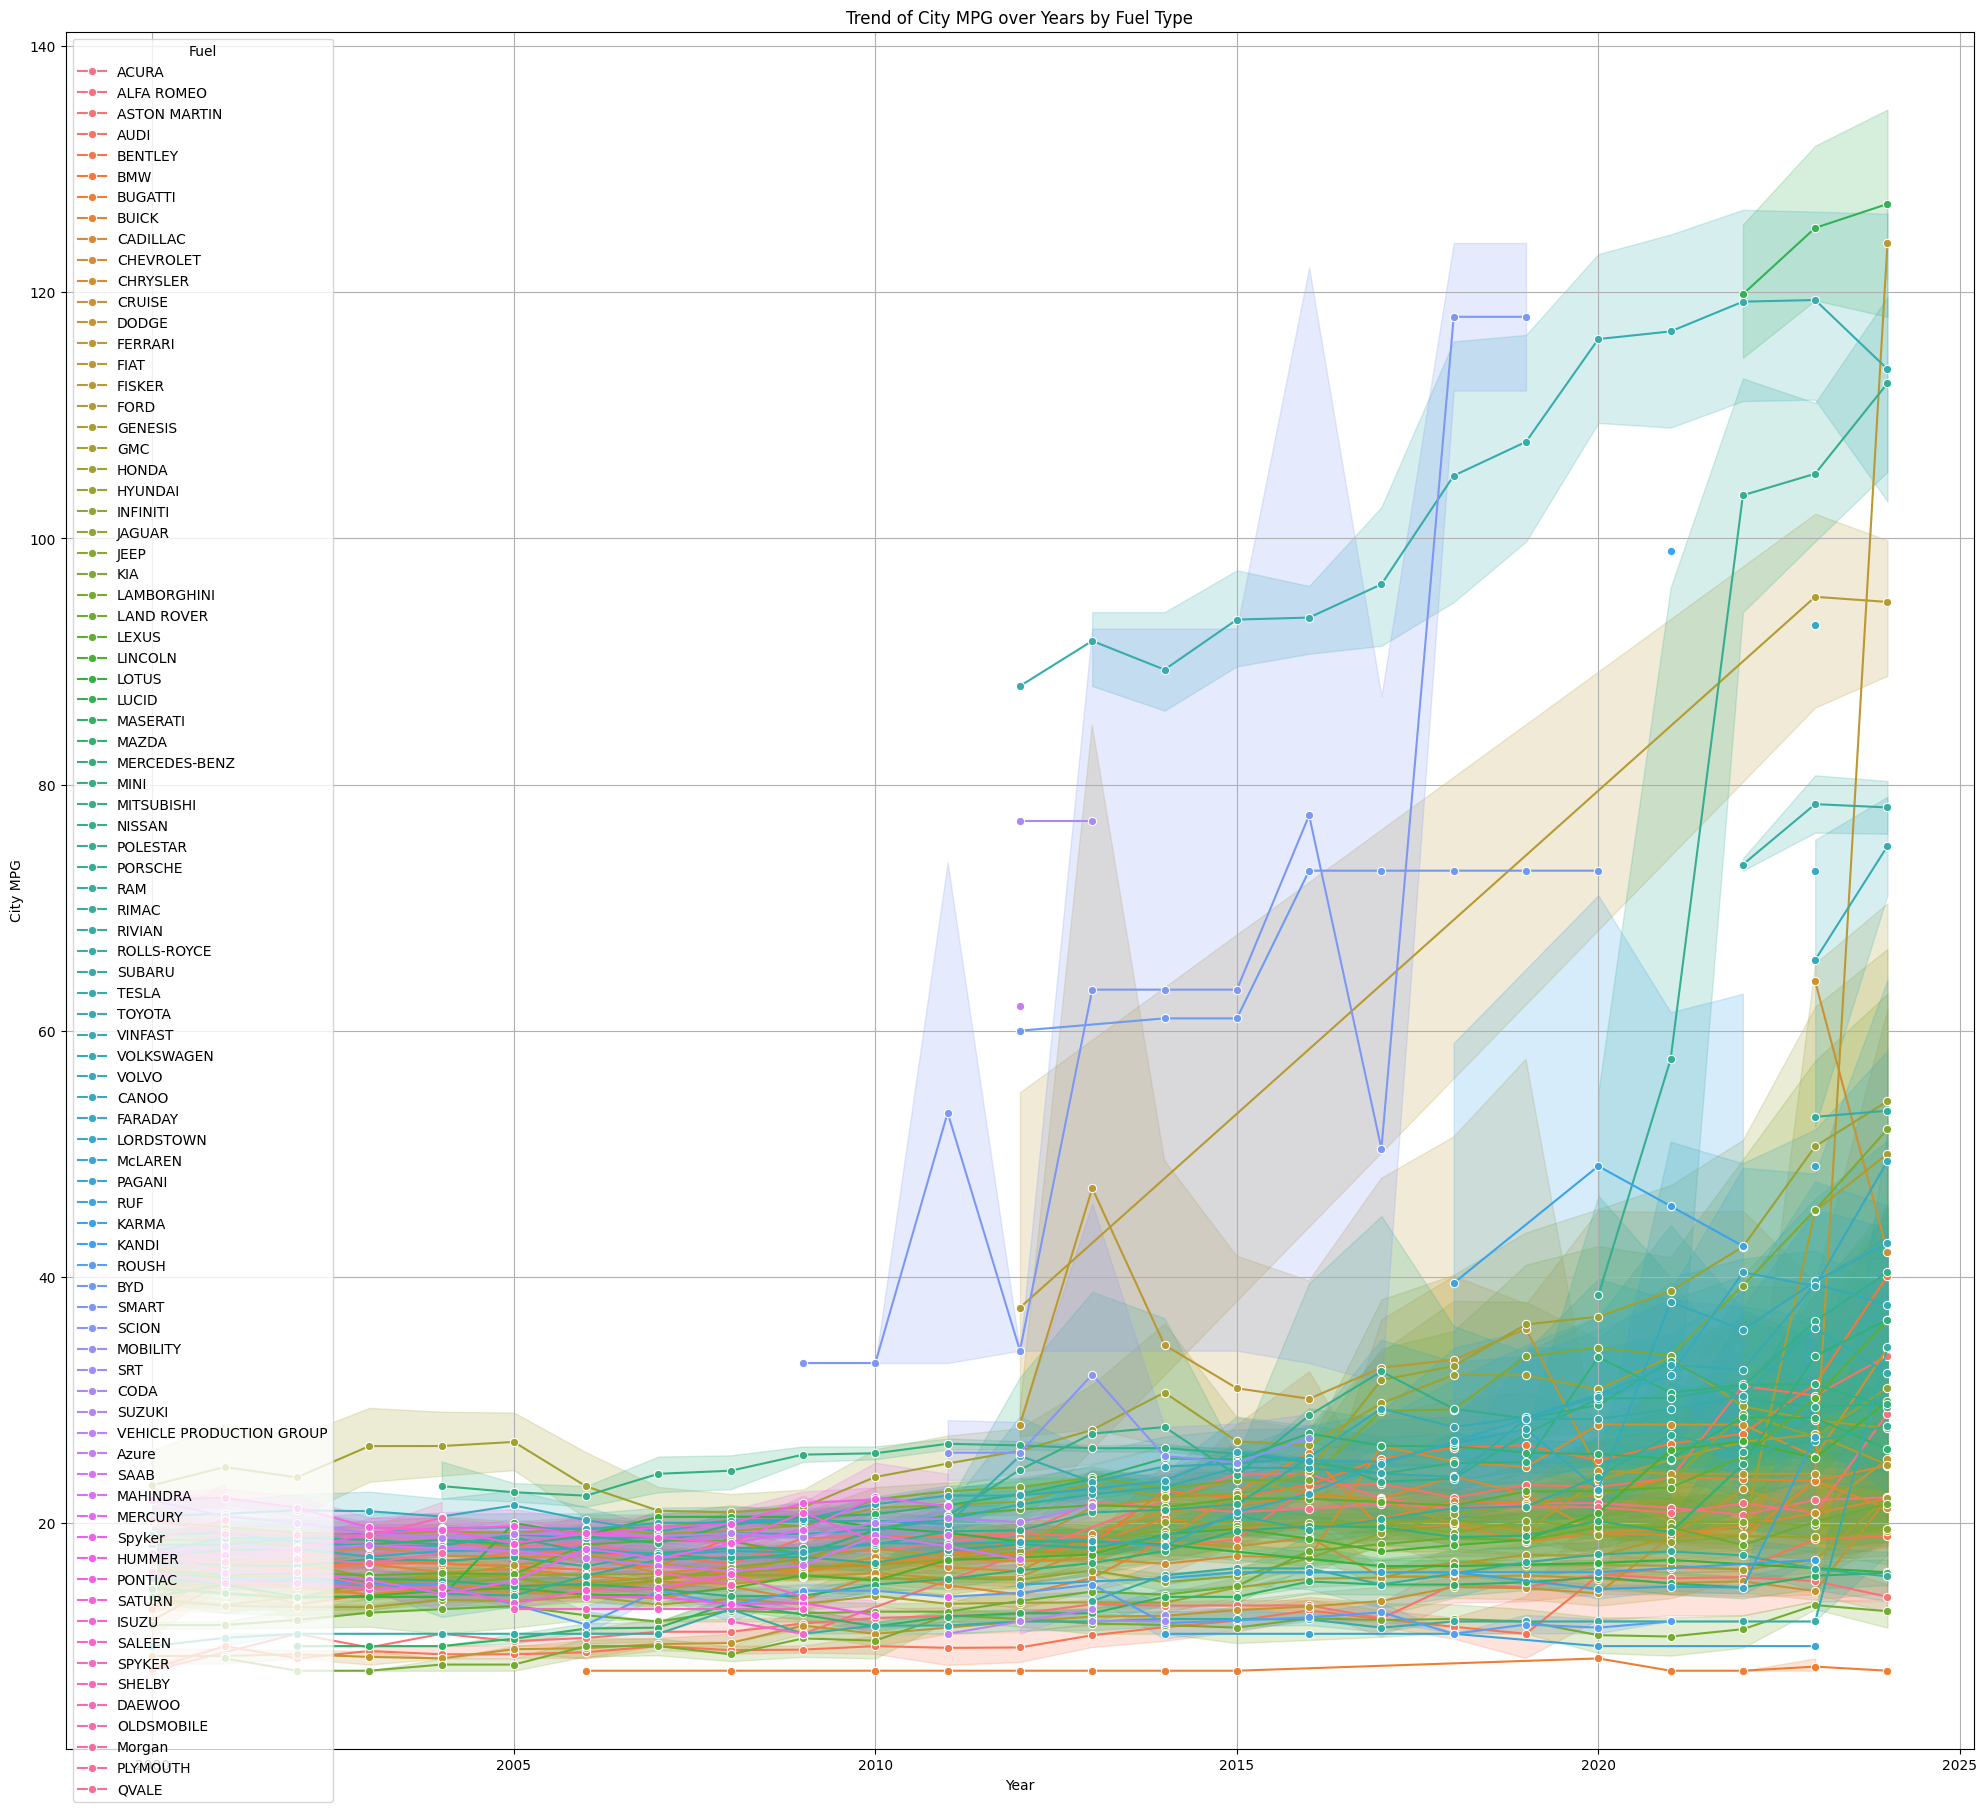

In [34]:
# Create the line plot
plt.figure(figsize=(20, 20))
sns.lineplot(data=merged_data, x='Year', y='City MPG', hue='Car_Make', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Fuel')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

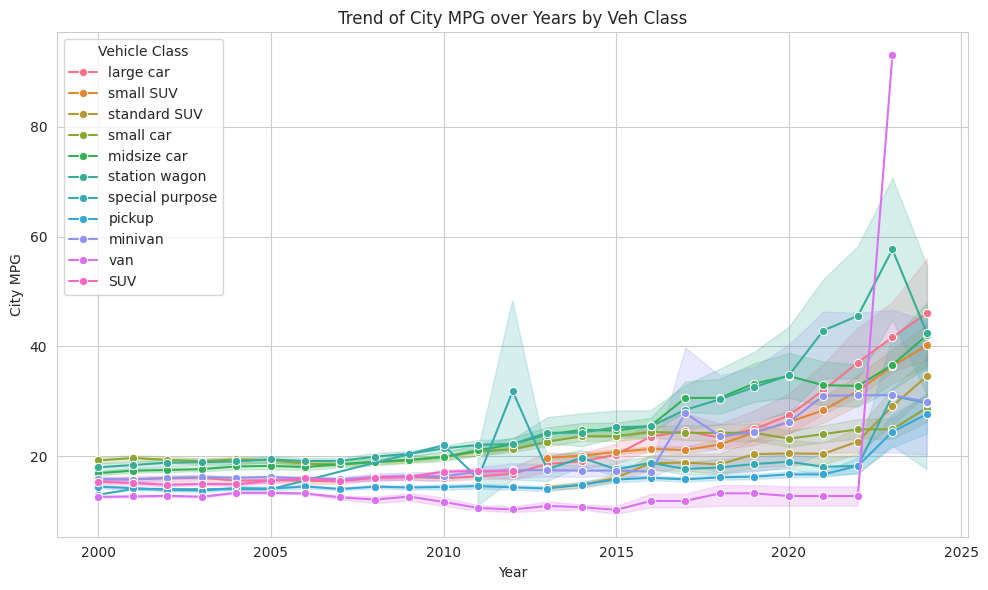

In [62]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='City MPG', hue='Veh Class', marker='o')
plt.title('Trend of City MPG over Years by Veh Class')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Vehicle Class')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

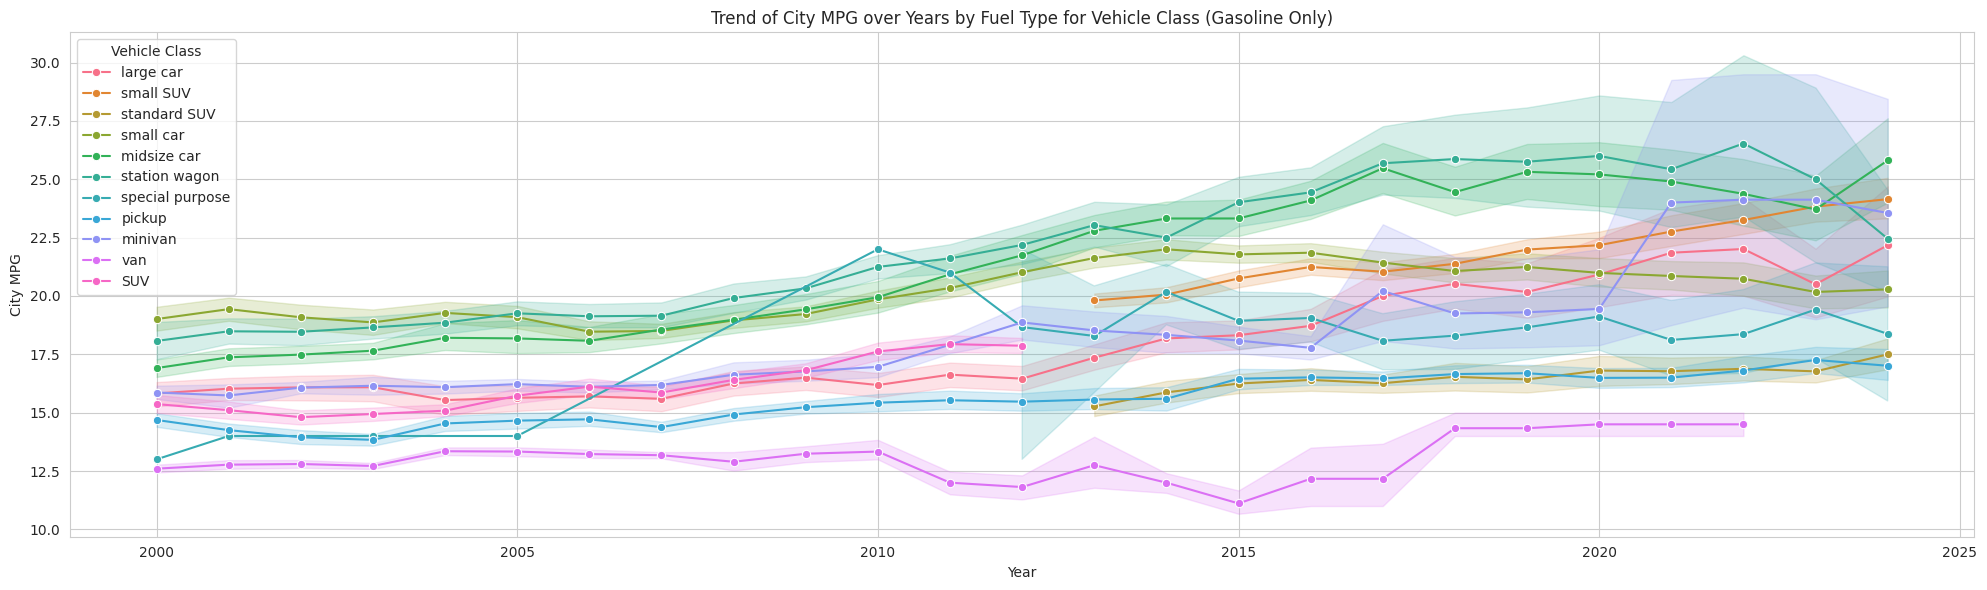

In [63]:
# Filter data for top 3 car makers and fuel type Gasoline

filtered_data = merged_data[(merged_data['Fuel'] == 'Gasoline')]

# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=filtered_data, x='Year', y='City MPG', hue='Veh Class', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type for Vehicle Class (Gasoline Only)')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Vehicle Class')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

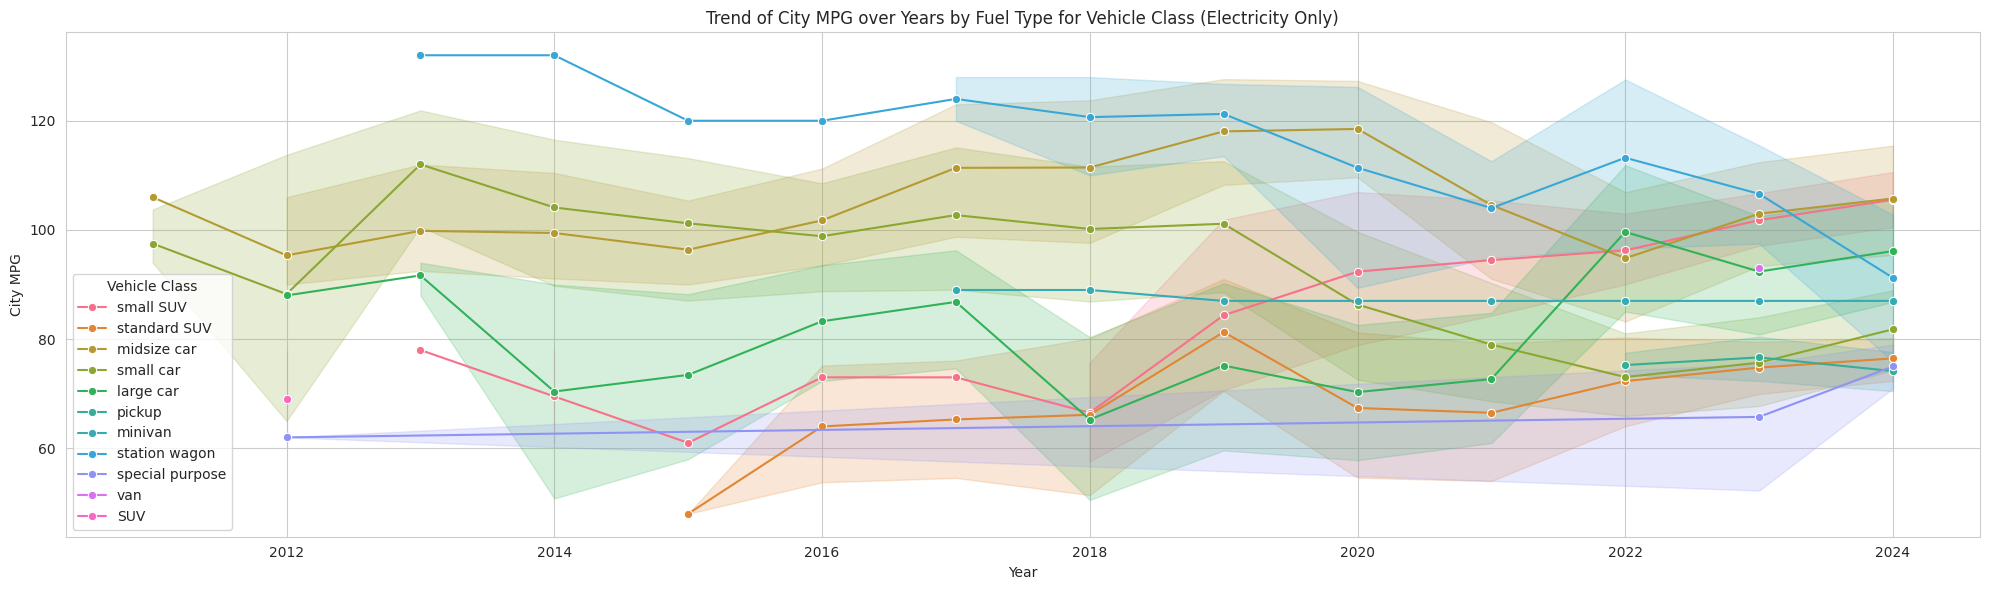

In [64]:
# Filter data for top 3 car makers and fuel type Gasoline

filtered_data = merged_data[(merged_data['Fuel'] == 'Electricity')]

# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=filtered_data, x='Year', y='City MPG', hue='Veh Class', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type for Vehicle Class (Electricity Only)')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Vehicle Class')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

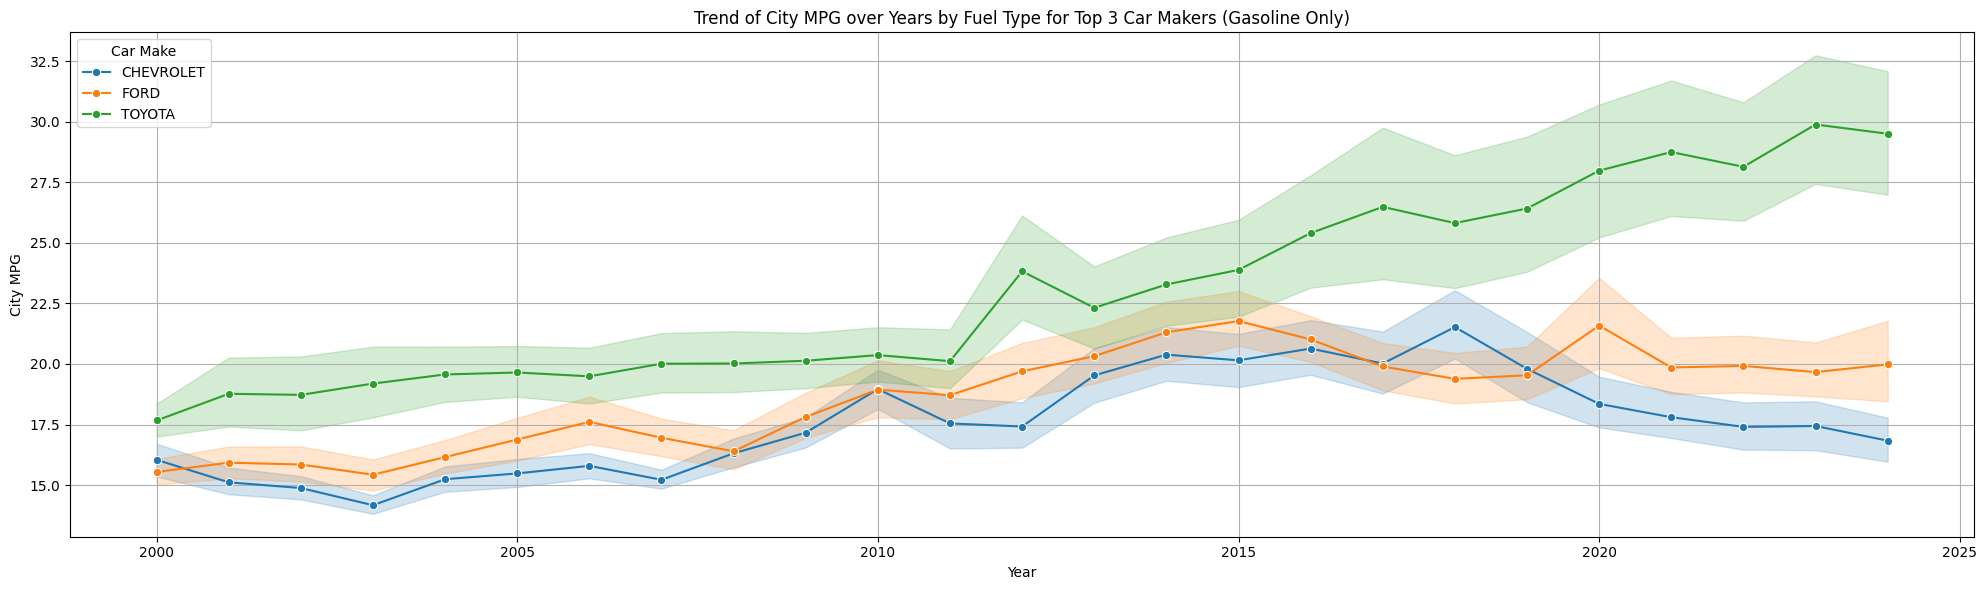

In [35]:
# Filter data for top 3 car makers and fuel type Gasoline
top_3_makers = ['FORD', 'TOYOTA', 'CHEVROLET']
filtered_data = merged_data[(merged_data['Car_Make'].isin(top_3_makers)) & (merged_data['Fuel'] == 'Gasoline')]

# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=filtered_data, x='Year', y='City MPG', hue='Car_Make', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type for Top 3 Car Makers (Gasoline Only)')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Car Make')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

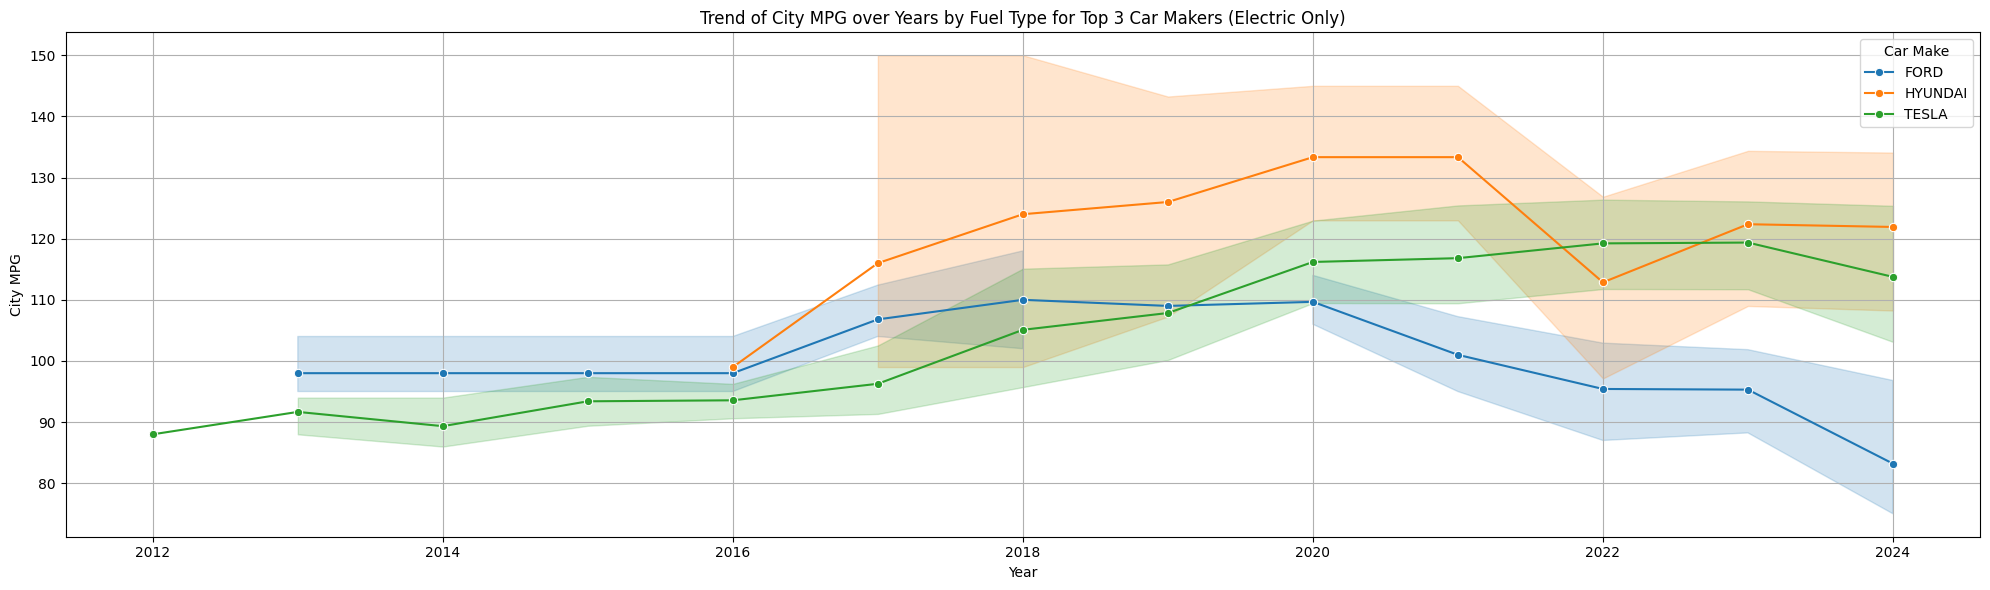

In [36]:
# Filter data for top 3 EV car makers and fuel type electricity
top_3_makers = ['TESLA', 'FORD', 'HYUNDAI'] #HYUNDAI NEED TO INCLUDE KIA AND GENESIS
filtered_data = merged_data[(merged_data['Car_Make'].isin(top_3_makers)) & (merged_data['Fuel'] == 'Electricity')]

# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=filtered_data, x='Year', y='City MPG', hue='Car_Make', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type for Top 3 Car Makers (Electric Only)')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Car Make')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

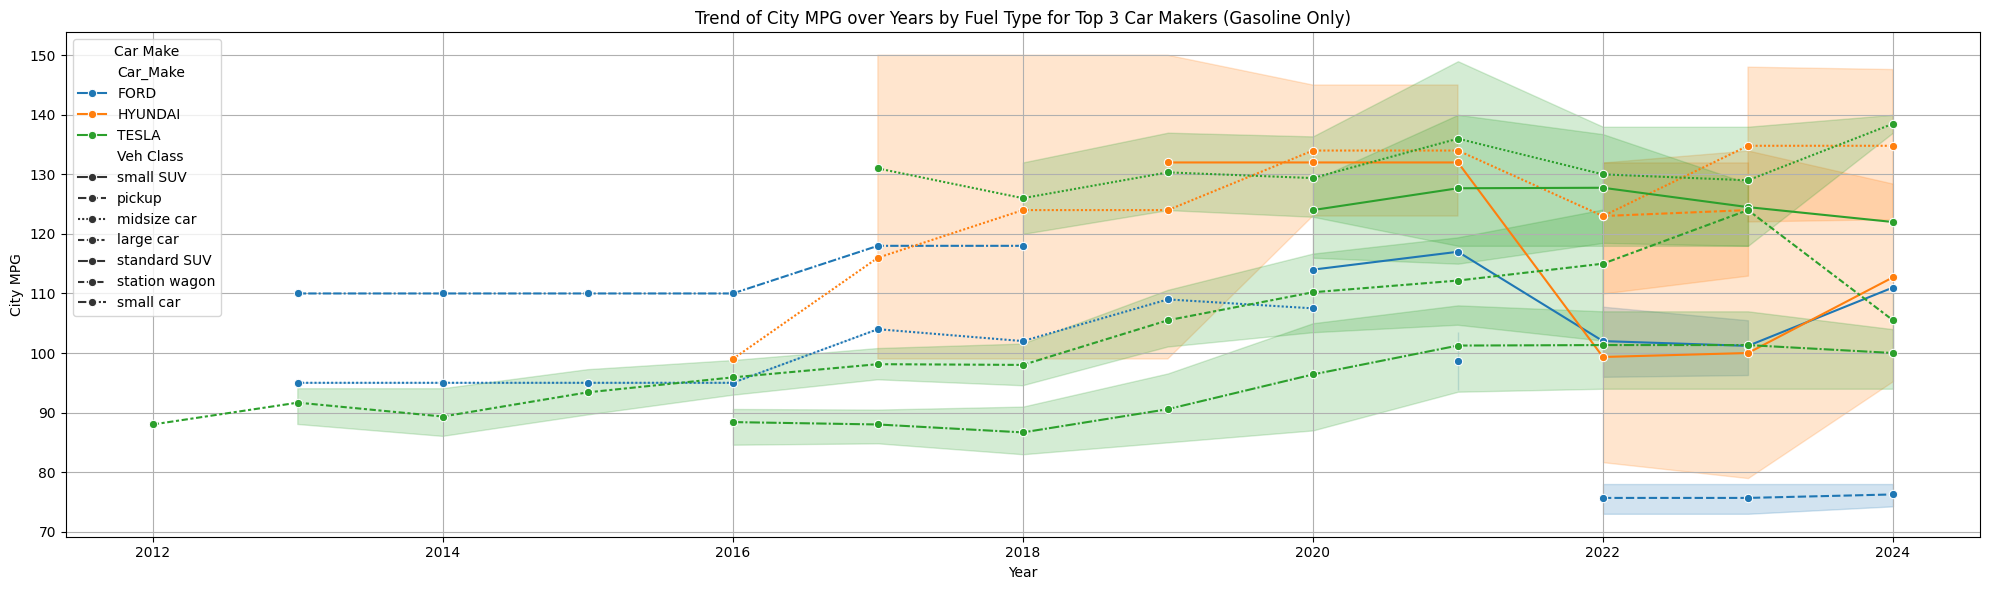

In [37]:
# Filter data for top 3 EV car makers and fuel type electricity
top_3_makers = ['TESLA', 'FORD', 'HYUNDAI']
filtered_data = merged_data[(merged_data['Car_Make'].isin(top_3_makers)) & (merged_data['Fuel'] == 'Electricity')]

# Create the line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=filtered_data, x='Year', y='City MPG', hue='Car_Make', style = 'Veh Class', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type for Top 3 Car Makers (Gasoline Only)')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Car Make')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

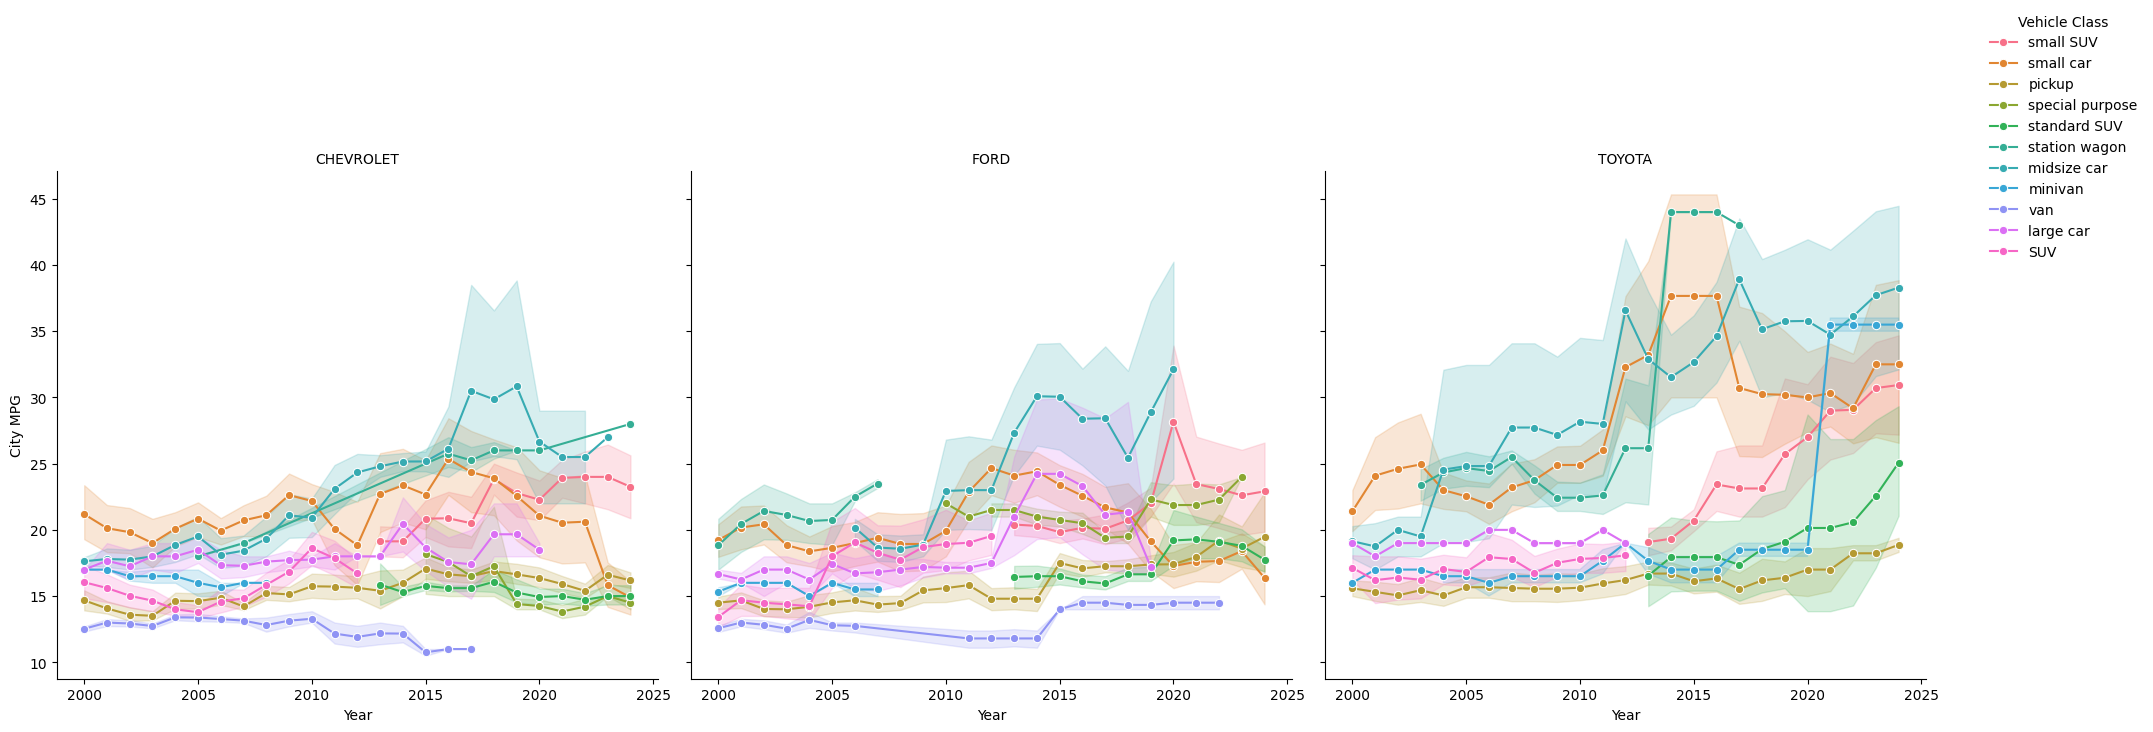

In [38]:
# Filter data for top 3 car makers, fuel type Gasoline, and vehicle class
top_3_makers = ['FORD', 'TOYOTA', 'CHEVROLET']
filtered_data = merged_data[(merged_data['Car_Make'].isin(top_3_makers)) & 
                            (merged_data['Fuel'] == 'Gasoline')]

# Check if there's data for each car make
available_makes = filtered_data['Car_Make'].unique()

# Create a FacetGrid only if there's data for at least one car make
if len(available_makes) > 0:
    # Create a FacetGrid
    g = sns.FacetGrid(filtered_data, col='Car_Make', hue='Veh Class', col_wrap=3, height=6, aspect=1)

    # Map a line plot onto the grid
    g.map(sns.lineplot, 'Year', 'City MPG', marker='o')

    # Set titles, labels, and legend
    g.set_titles('{col_name}')
    g.set_xlabels('Year')
    g.set_ylabels('City MPG')

    # Move legend outside the plot
    g.add_legend(title='Vehicle Class', bbox_to_anchor=(1.1, 1))

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for the selected car makes.")

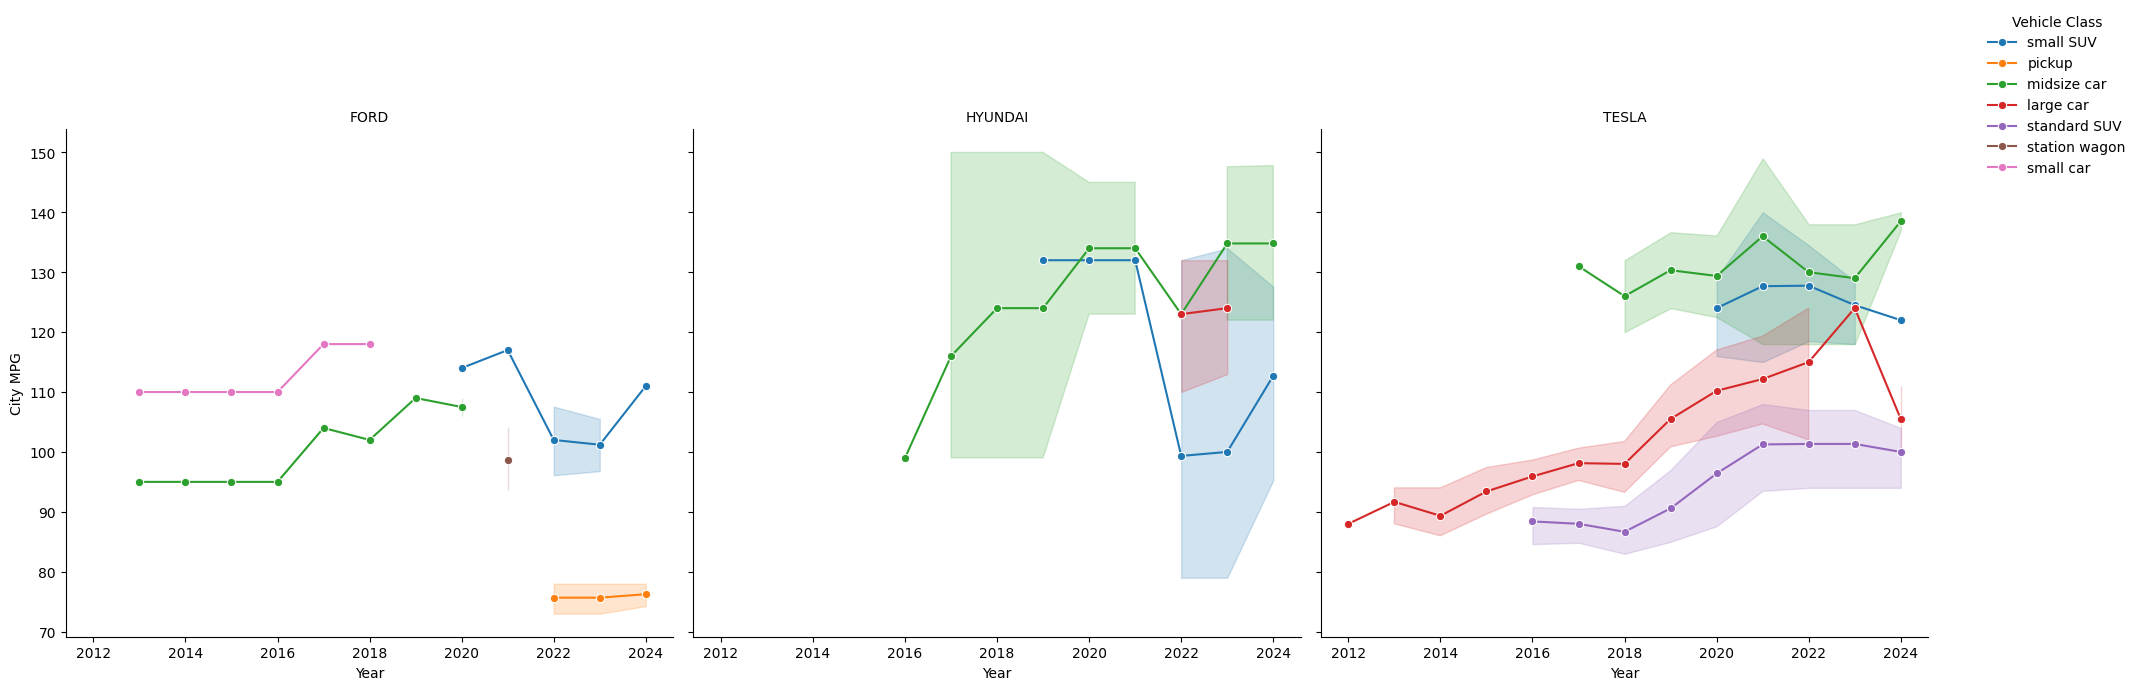

In [39]:
# Filter data for top 3 car makers, fuel type Gasoline, and vehicle class
top_3_makers = ['TESLA', 'FORD', 'HYUNDAI']
filtered_data = merged_data[(merged_data['Car_Make'].isin(top_3_makers)) & 
                            (merged_data['Fuel'] == 'Electricity')]

# Check if there's data for each car make
available_makes = filtered_data['Car_Make'].unique()

# Create a FacetGrid only if there's data for at least one car make
if len(available_makes) > 0:
    # Create a FacetGrid
    g = sns.FacetGrid(filtered_data, col='Car_Make', hue='Veh Class', col_wrap=3, height=6, aspect=1)

    # Map a line plot onto the grid
    g.map(sns.lineplot, 'Year', 'City MPG', marker='o')

    # Set titles, labels, and legend
    g.set_titles('{col_name}')
    g.set_xlabels('Year')
    g.set_ylabels('City MPG')

    # Move legend outside the plot
    g.add_legend(title='Vehicle Class', bbox_to_anchor=(1.1, 1))

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for the selected car makes.")

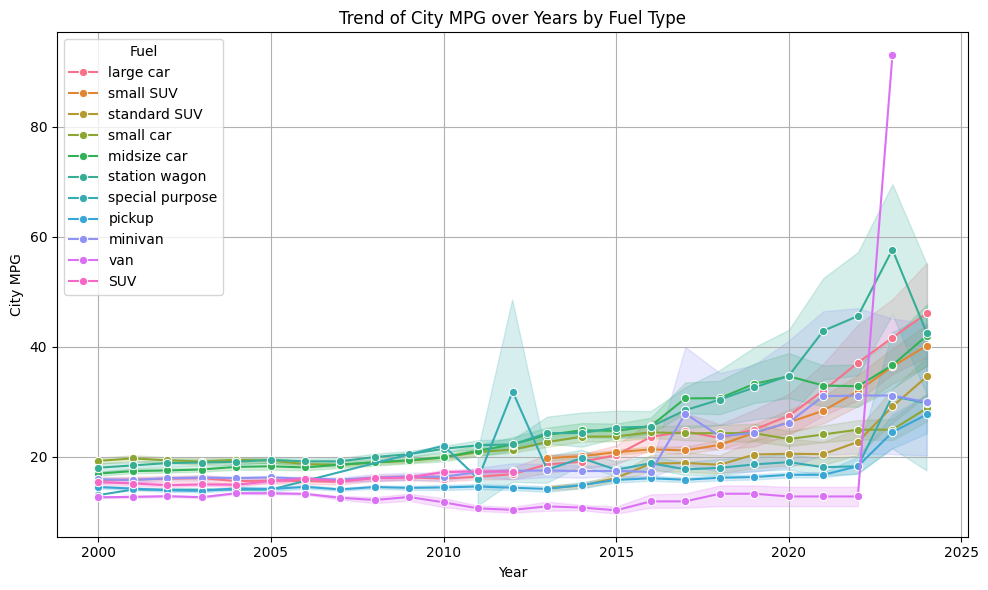

In [40]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='City MPG', hue='Veh Class', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Fuel')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

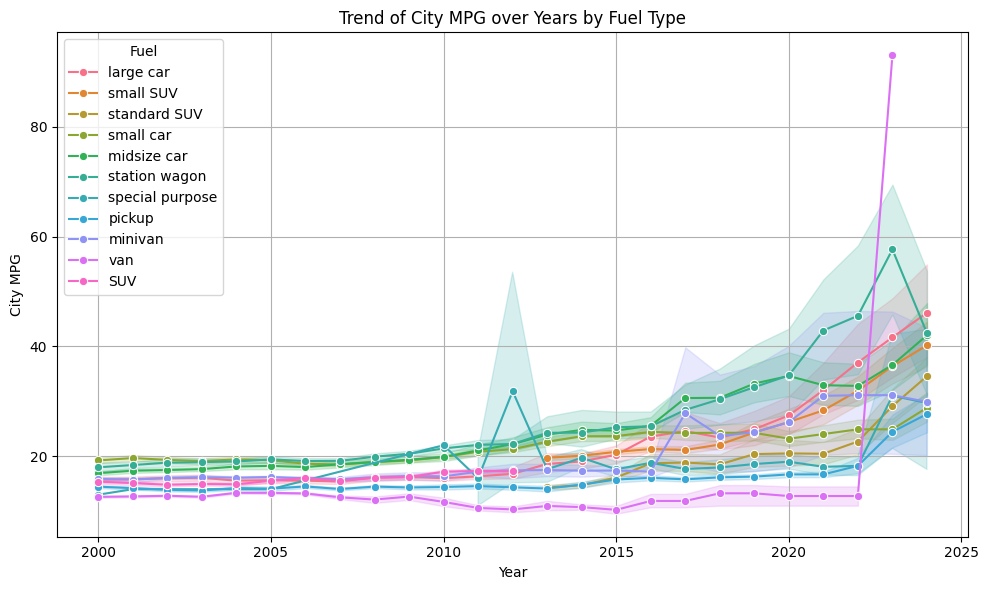

In [41]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='City MPG', hue='Veh Class', marker='o')
plt.title('Trend of City MPG over Years by Fuel Type')
plt.xlabel('Year')
plt.ylabel('City MPG')
plt.legend(title='Fuel')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

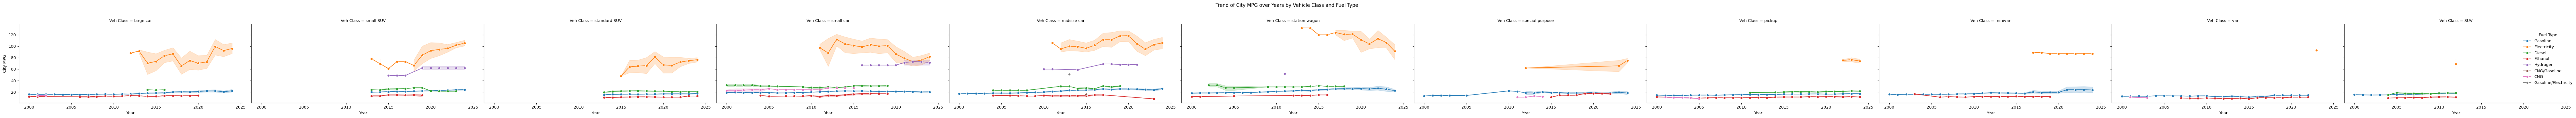

In [42]:
# Create a Facet Grid plot
g = sns.FacetGrid(merged_data, col='Veh Class', hue='Fuel', margin_titles=True, height=4, aspect=2)
g.map(sns.lineplot, 'Year', 'City MPG', marker='o')
g.set_axis_labels('Year', 'City MPG')
g.add_legend(title='Fuel Type')
plt.suptitle('Trend of City MPG over Years by Vehicle Class and Fuel Type', y=1.02)
plt.tight_layout()
plt.show()

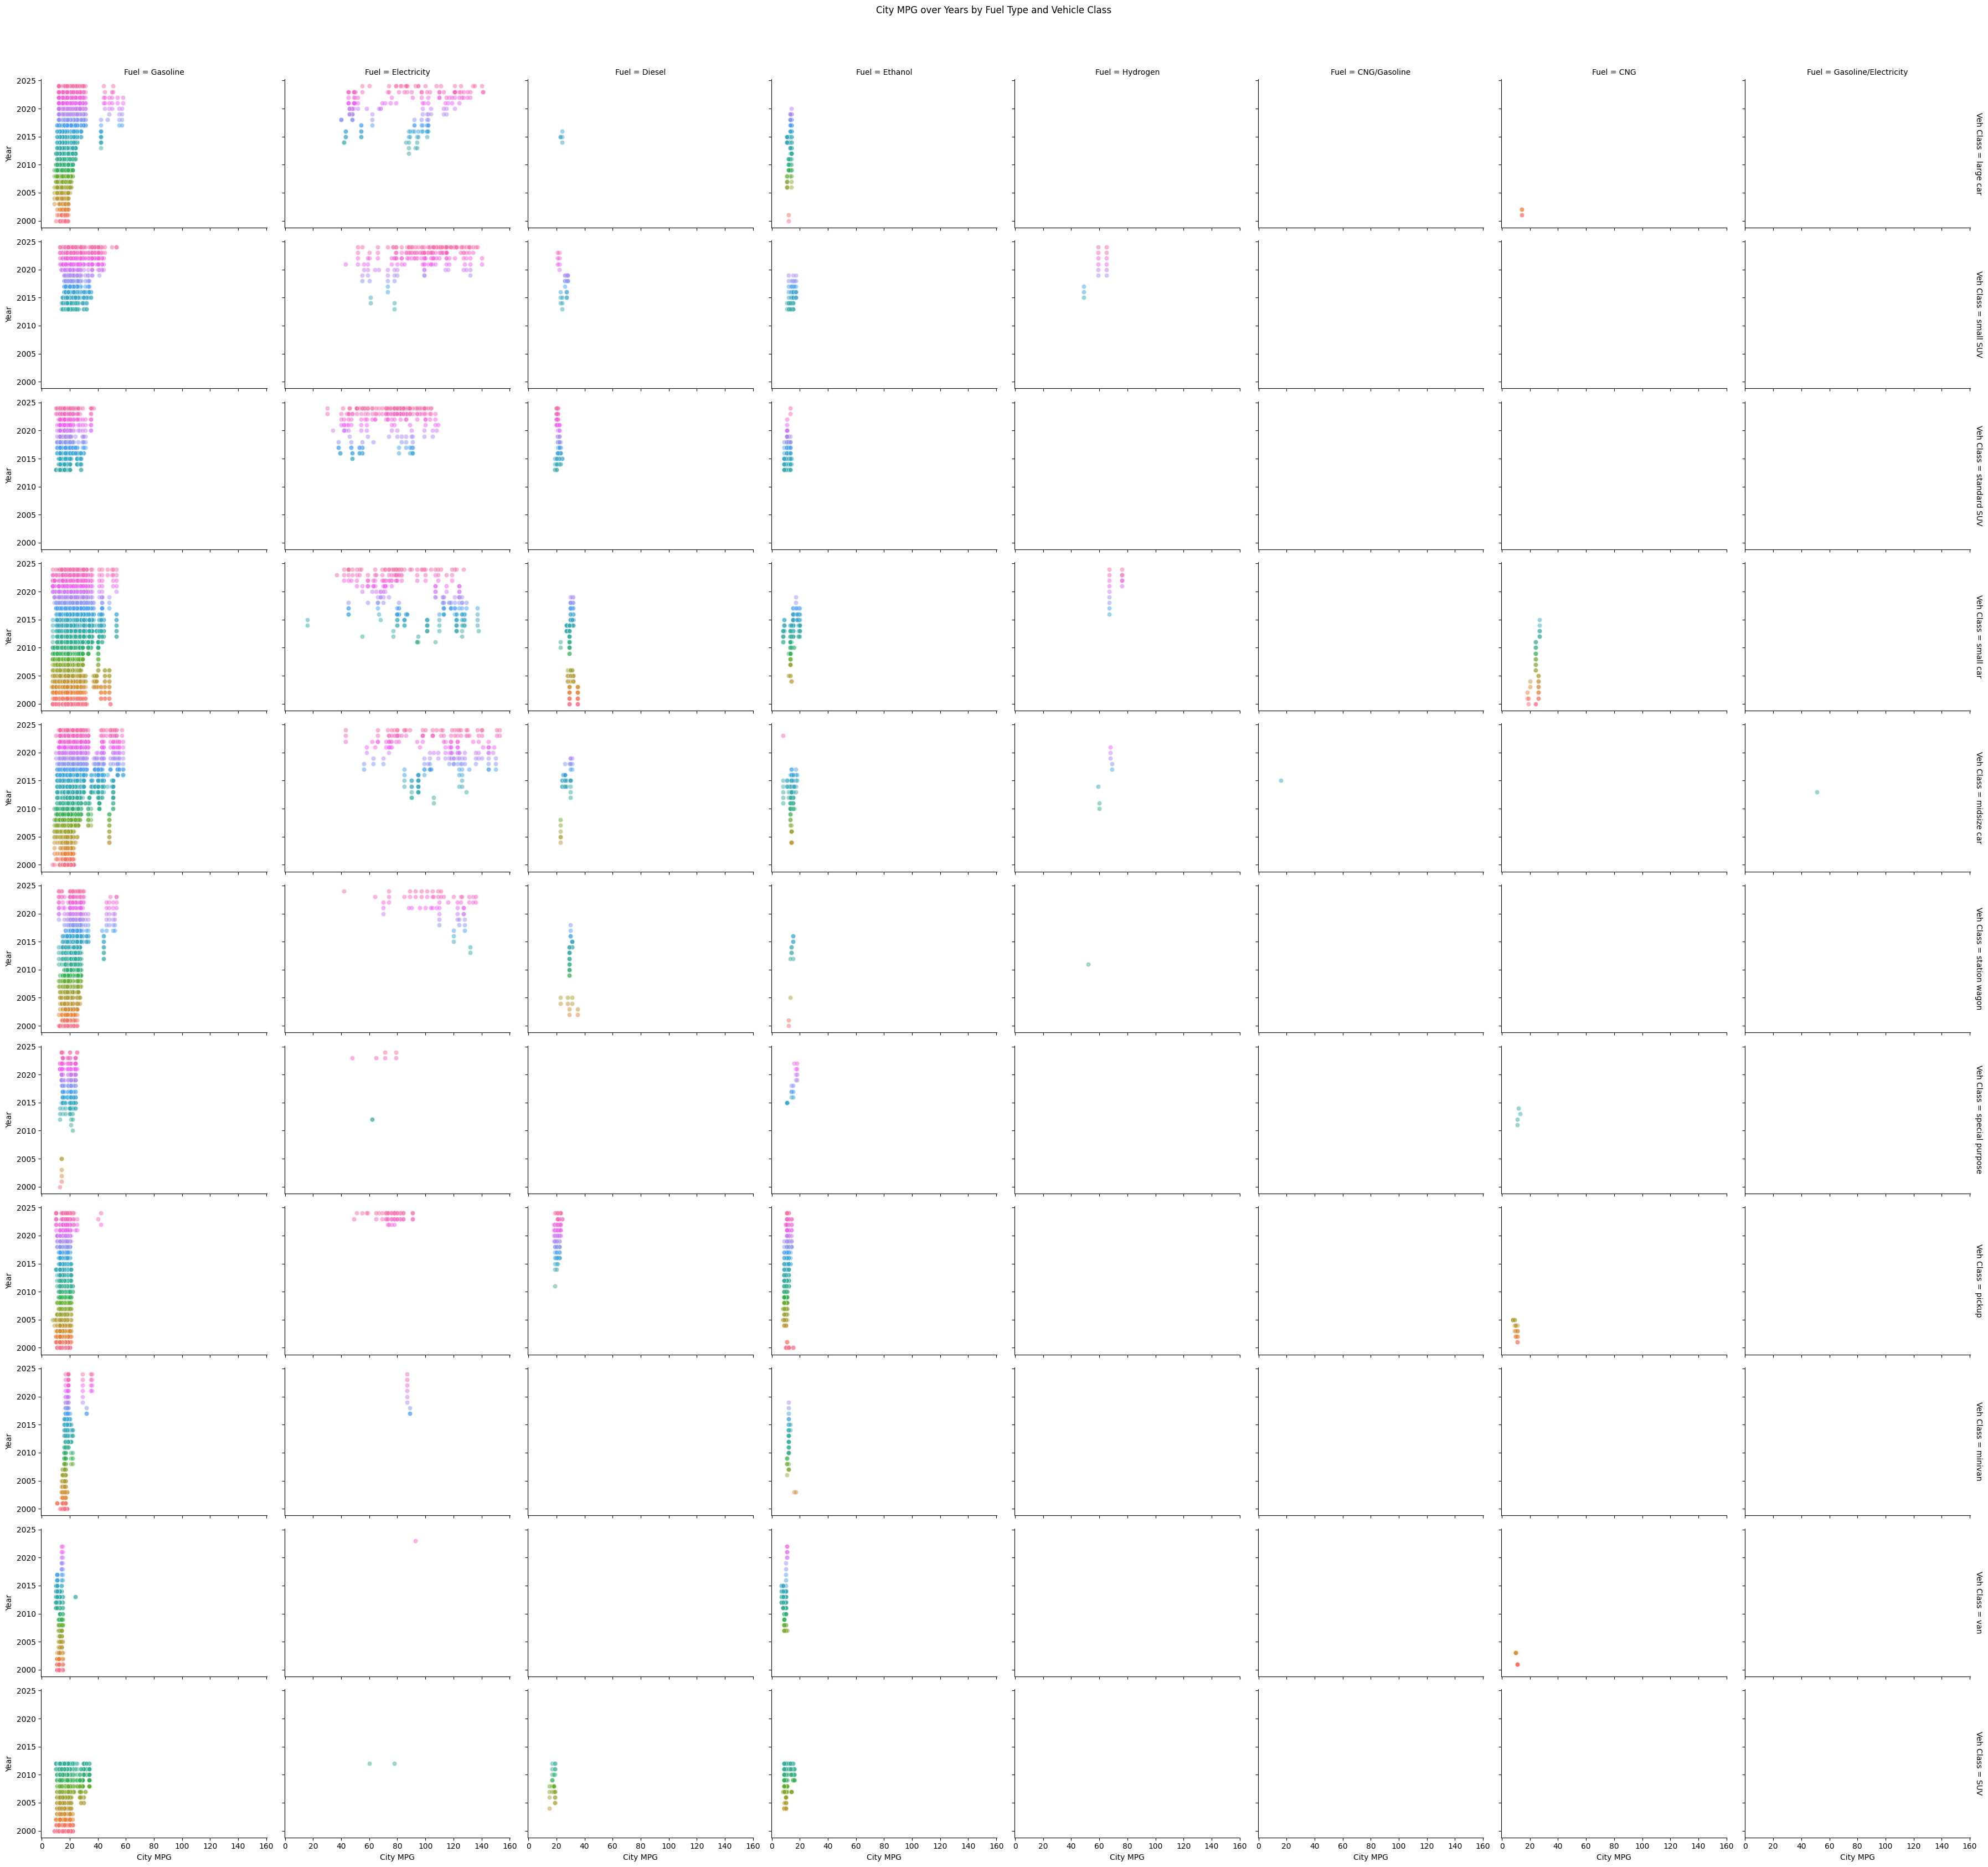

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Facet Grid plot
g = sns.FacetGrid(merged_data, col='Fuel', row='Veh Class', hue='Year', margin_titles=True, height=3, aspect=1.5)
g.map(sns.scatterplot, 'City MPG', 'Year', alpha=0.5, edgecolor='w')
g.set_axis_labels('City MPG', 'Year')
# g.add_legend(title='Year')
plt.suptitle('City MPG over Years by Fuel Type and Vehicle Class', y=1.02)
plt.tight_layout()
plt.show()

In [56]:
merged_data.columns

Index(['Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'Year', 'Car_Make', 'Car_Model', 'IsHybrid'],
      dtype='object')

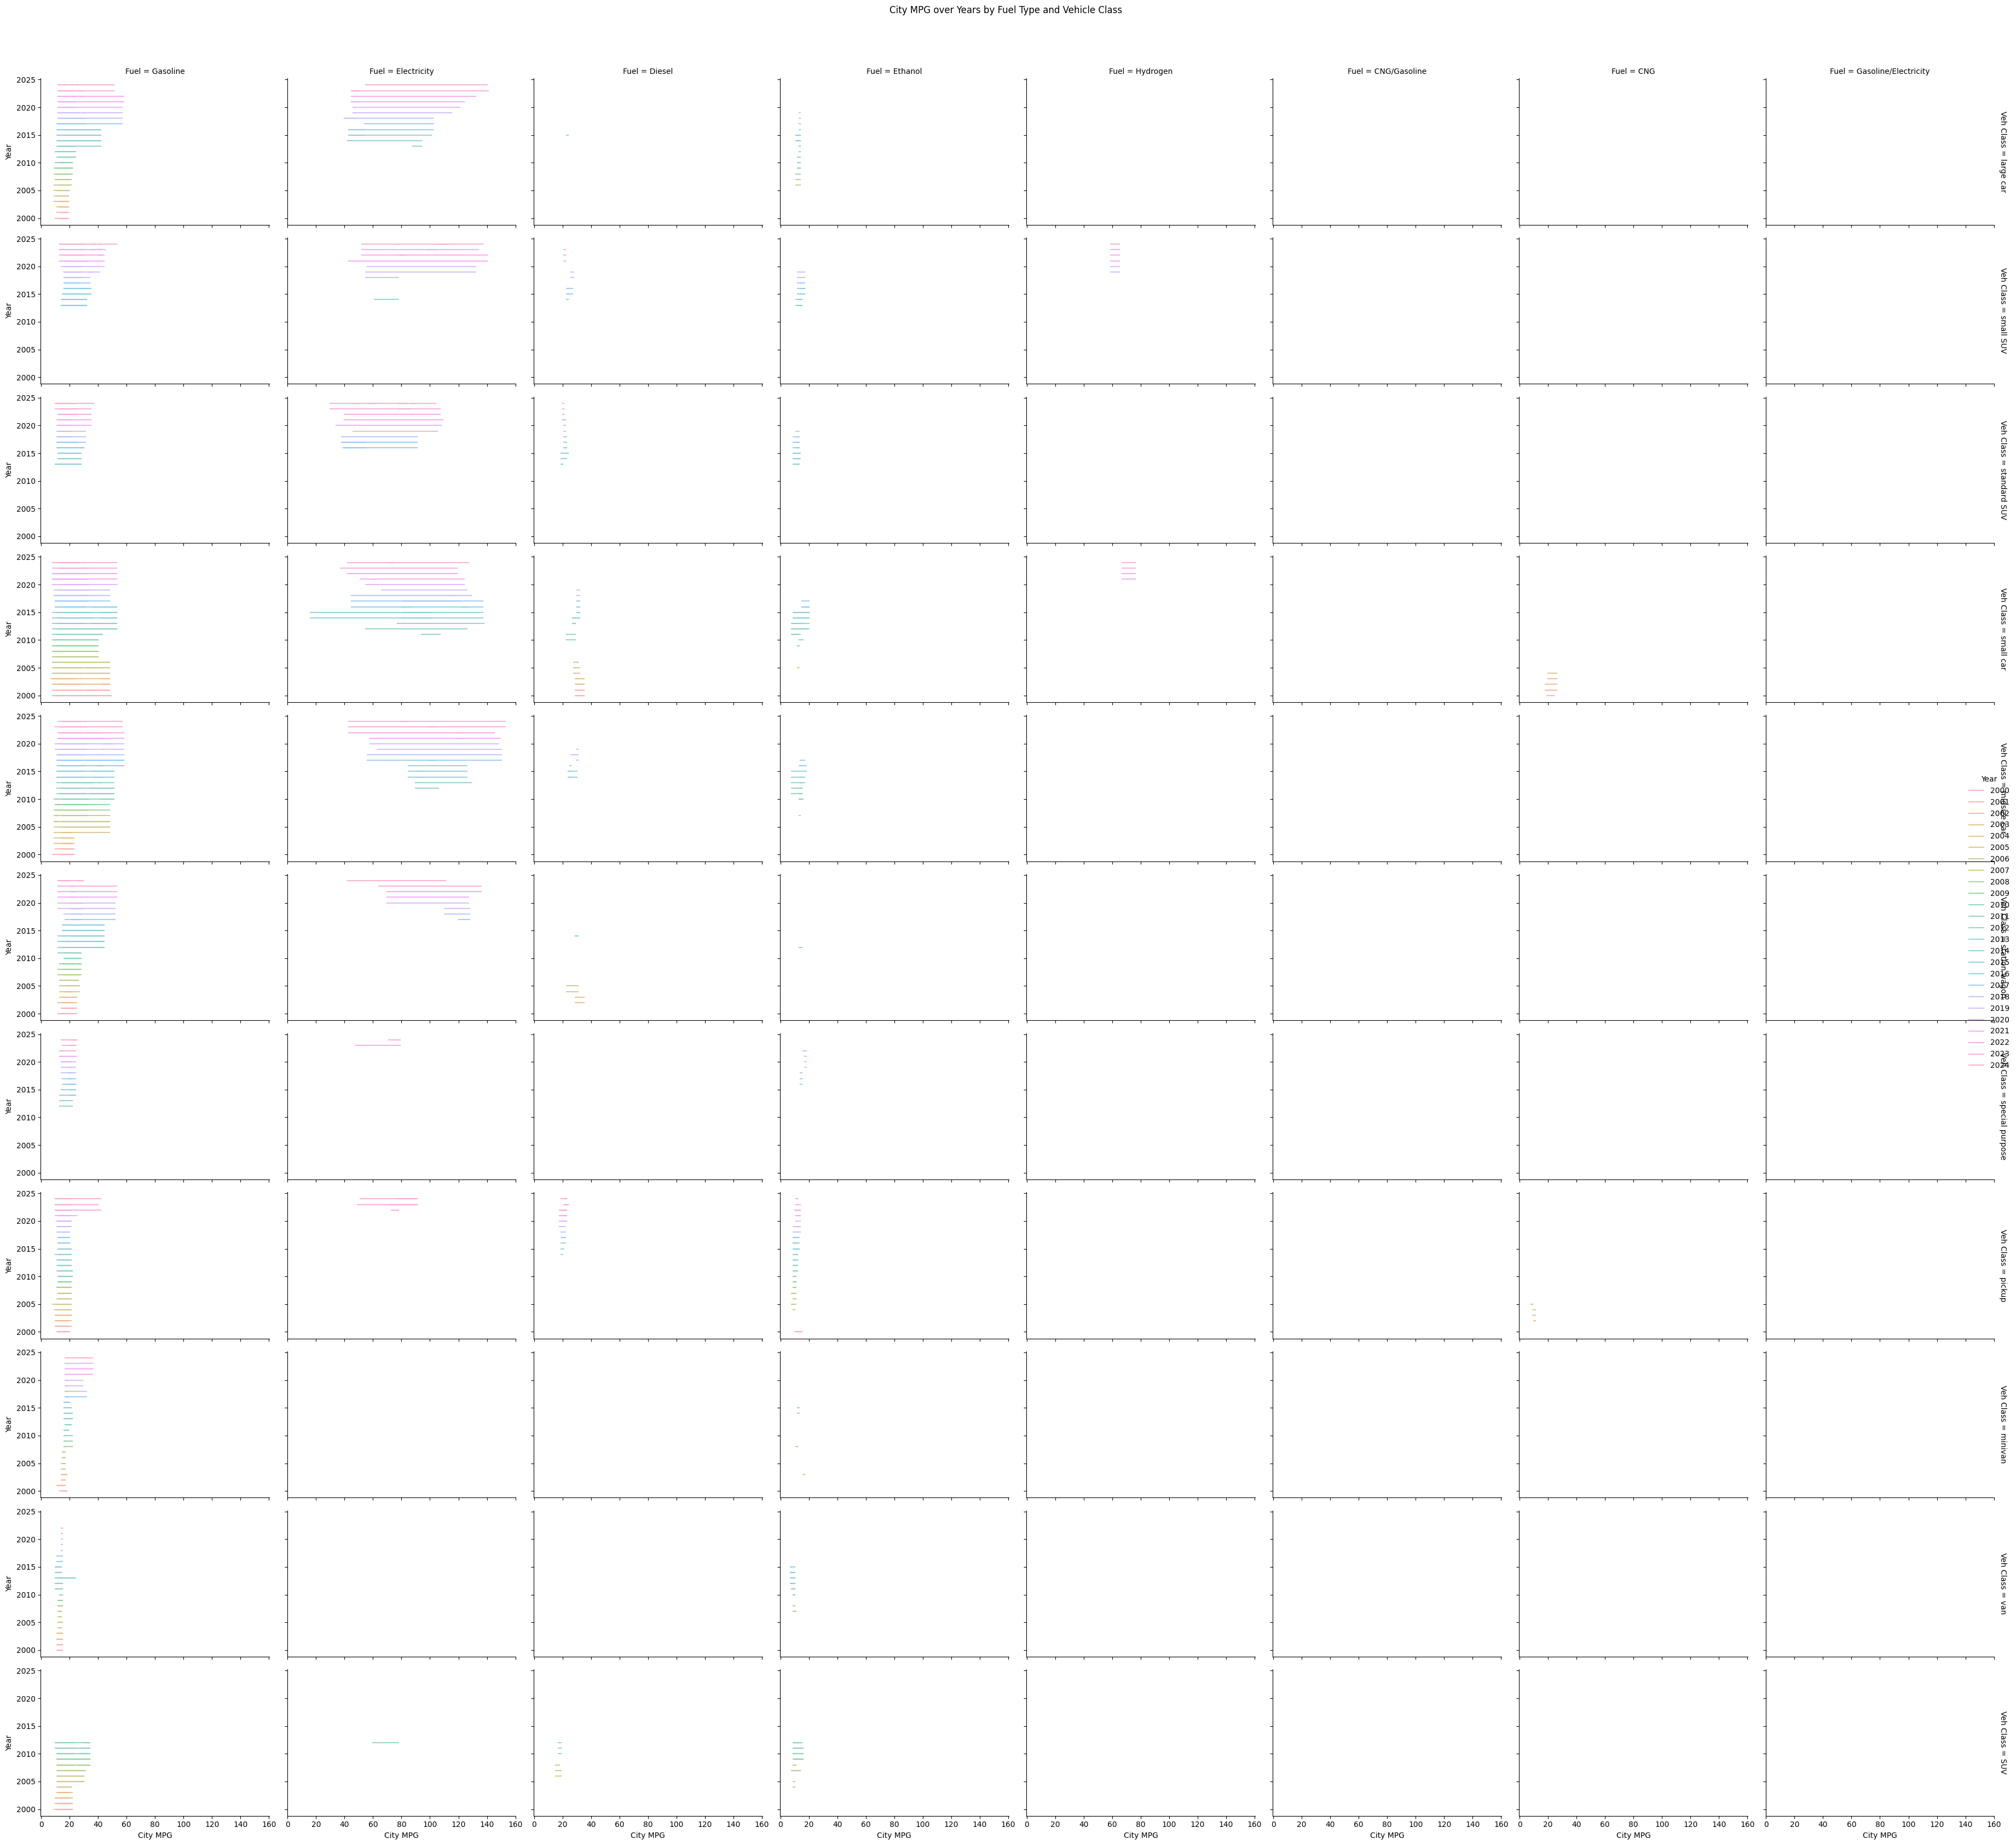

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Facet Grid plot
g = sns.FacetGrid(merged_data, col='Fuel', row='Veh Class', hue='Year', margin_titles=True, height=3, aspect=1.5)
g.map(sns.lineplot, 'City MPG', 'Year', alpha=0.5)
g.set_axis_labels('City MPG', 'Year')
g.add_legend(title='Year')
plt.suptitle('City MPG over Years by Fuel Type and Vehicle Class', y=1.02)
plt.tight_layout()
plt.show()

In [45]:
# List of car makes we wish to isolate
car_makes = ['FORD', 'TESLA', 'HYUNDAI']
# Step 1: Filter for specific car makes
filtered_data = merged_data[merged_data['Car_Make'].isin(car_makes)]
# Step 2: Filter to include only rows where 'Fuel' is 'Electricity'
electric_vehicles = filtered_data[filtered_data['Fuel'] == 'Electricity']
# Step 3: Sort the data by 'Year'
sorted_electric_vehicles = electric_vehicles.sort_values(by='Year')
# Display the sorted, filtered rows
sorted_electric_vehicles



Displ  Cyl   Trans Drive         Fuel    Veh Class Air Pollution Score  \
22271    NaN  NaN  Auto-1   2WD  Electricity    large car                  10   
20231    NaN  NaN  Auto-1   2WD  Electricity    large car                  10   
19123    2.0  4.0     CVT   2WD  Electricity  midsize car                   9   
20230    NaN  NaN  Auto-1   2WD  Electricity    large car                  10   
19121    2.0  4.0     CVT   2WD  Electricity  midsize car                   7   
...      ...  ...     ...   ...          ...          ...                 ...   
413      NaN  NaN  Auto-1   4WD  Electricity       pickup                  10   
581      1.6  4.0   AMS-6   4WD  Electricity    small SUV                   7   
561      NaN  NaN  Auto-1   2WD  Electricity    small SUV                  10   
393      2.5  4.0     CVT   2WD  Electricity    small SUV                   8   
1139     NaN  NaN  Auto-1   4WD  Electricity    small SUV                  10   

       City MPG Hwy MPG Cmb MPG Greenhouse Gas Score  Year Car_Make  \
22271      88.0      90      89                   10  2012    TESLA   
20231      93.0      96      94                   10  2013    TESLA   
19123      95.0   36/81   38/88                   10  2013     FORD   
20230      88.0      90      89                   10  2013    TESLA   
19121      95.0   36/81   38/88                   10  2013     FORD   
...         ...     ...     ...                  ...   ...      ...   
413        76.0      61      68                 10.0  2024     FORD   
581        87.0   35/74   35/80                  9.0  2024  HYUNDAI   
561       131.0     105     118                 10.0  2024  HYUNDAI   
393       111.0   37/91  40/101                 10.0  2024     FORD   
1139      122.0     112     117                 10.0  2024    TESLA   

                          Car_Model         IsHybrid  
22271                       Model S       Not Hybrid  
20231                       Model S       Not Hybrid  
19123                   Fusion PHEV  Electric Hybrid  
20230                       Model S       Not Hybrid  
19121                   Fusion PHEV  Electric Hybrid  
...                             ...              ...  
413                  F150 Lightning       Not Hybrid  
581           Tuscon Plug-in Hybrid  Electric Hybrid  
561    Kona Electric Standard Range       Not Hybrid  
393                     Escape PHEV  Electric Hybrid  
1139             Model Y Long Range       Not Hybrid  

[258 rows x 15 columns]

In [46]:
# Now the gasoline version
# List of car makes we wish to isolate
car_makes = ['FORD', 'CHEVROLET', 'TOYOTA']
# Step 1: Filter for specific car makes
filtered_data = merged_data[merged_data['Car_Make'].isin(car_makes)]
# Step 2: Filter to include only rows where 'Fuel' is 'Gasoline'
gasoline_vehicles = filtered_data[filtered_data['Fuel'] == 'Gasoline']
# Step 3: Sort the data by 'Year'
sorted_gasoline_vehicles = gasoline_vehicles.sort_values(by='Year')
# Display the sorted, filtered rows
sorted_gasoline_vehicles

Displ  Cyl        Trans Drive      Fuel     Veh Class  \
40070    3.1  6.0      Auto-L4   2WD  Gasoline   midsize car   
40033    2.4  4.0      Auto-L4   2WD  Gasoline     small car   
40064    1.3  4.0        Man-5   2WD  Gasoline     small car   
40063    1.3  4.0       Auto-3   2WD  Gasoline     small car   
40062    3.1  6.0      Auto-L4   2WD  Gasoline   midsize car   
...      ...  ...          ...   ...       ...           ...   
296      2.7  4.0       Auto-8   4WD  Gasoline        pickup   
320      6.2  8.0      Auto-10   2WD  Gasoline  standard SUV   
409      3.5  6.0  SemiAuto-10   4WD  Gasoline        pickup   
278      2.7  4.0       Auto-8   4WD  Gasoline        pickup   
317      5.3  8.0      Auto-10   2WD  Gasoline  standard SUV   

      Air Pollution Score  City MPG Hwy MPG Cmb MPG Greenhouse Gas Score  \
40070                   2      18.0      27      21                    6   
40033                   0      19.0      28      23                    7   
40064                   2      31.0      38      34                    9   
40063                   2      26.0      31      28                    8   
40062                   0      18.0      27      21                    6   
...                   ...       ...     ...     ...                  ...   
296                     7      16.0      17      17                  3.0   
320                     6      14.0      20      16                  3.0   
409                     7      16.0      24      19                  4.0   
278                     7      18.0      21      19                  4.0   
317                     6      15.0      20      17                  3.0   

       Year   Car_Make                       Car_Model    IsHybrid  
40070  2000  CHEVROLET                     Monte Carlo  Not Hybrid  
40033  2000  CHEVROLET                        Cavalier  Not Hybrid  
40064  2000  CHEVROLET                           Metro  Not Hybrid  
40063  2000  CHEVROLET                           Metro  Not Hybrid  
40062  2000  CHEVROLET                          Malibu  Not Hybrid  
...     ...        ...                             ...         ...  
296    2024  CHEVROLET  Silverado 4WD Mud Terrain Tire  Not Hybrid  
320    2024  CHEVROLET                           Tahoe  Not Hybrid  
409    2024       FORD                            F150  Not Hybrid  
278    2024  CHEVROLET                       Silverado  Not Hybrid  
317    2024  CHEVROLET                           Tahoe  Not Hybrid  

[7583 rows x 15 columns]

In [57]:
if all(col in sorted_gasoline_vehicles.columns for col in ['Year', 'City MPG', 'Fuel', 'Car_Make']):
    # Filter the dataset for the years 2000 to 2024
    filtered_data = sorted_gasoline_vehicles[(sorted_gasoline_vehicles['Year'] >= 2000) & (sorted_gasoline_vehicles['Year'] <= 2024)]
    # Further filter the dataset to include only the specified 'Fuel' types
    fuel_types = ['Gasoline', 'Electricity', 'Gasoline/Electricity']
    filtered_data = filtered_data[filtered_data['Fuel'].isin(fuel_types)]
    # Group by 'Year', 'Fuel', and 'Car_Make', and calculate the average 'City MPG'
    average_city_mpg_by_year_fuel_and_make = filtered_data.groupby(['Year', 'Fuel', 'Car_Make'])['City MPG'].mean().reset_index()
    # Rename columns for clarity
    average_city_mpg_by_year_fuel_and_make.columns = ['Year', 'Fuel', 'Car Make', 'Average City MPG']
    pd.set_option('display.max_rows', 1500)
    # Print or inspect the results
    print(average_city_mpg_by_year_fuel_and_make)
else:
    print("The dataset does not contain the necessary 'Year', 'City MPG', 'Fuel', and 'Car_Make' columns.")

    Year      Fuel   Car Make  Average City MPG
0   2000  Gasoline  CHEVROLET         16.042683
1   2000  Gasoline       FORD         15.540984
2   2000  Gasoline     TOYOTA         17.666667
3   2001  Gasoline  CHEVROLET         15.113636
4   2001  Gasoline       FORD         15.923810
5   2001  Gasoline     TOYOTA         18.769231
6   2002  Gasoline  CHEVROLET         14.877551
7   2002  Gasoline       FORD         15.848485
8   2002  Gasoline     TOYOTA         18.724138
9   2003  Gasoline  CHEVROLET         14.167702
10  2003  Gasoline       FORD         15.427273
11  2003  Gasoline     TOYOTA         19.190476
12  2004  Gasoline  CHEVROLET         15.240741
13  2004  Gasoline       FORD         16.154762
14  2004  Gasoline     TOYOTA         19.567010
15  2005  Gasoline  CHEVROLET         15.481132
16  2005  Gasoline       FORD         16.880952
17  2005  Gasoline     TOYOTA         19.648148
18  2006  Gasoline  CHEVROLET         15.792793
19  2006  Gasoline       FORD         17

In [60]:
if all(col in sorted_electric_vehicles.columns for col in ['Year', 'City MPG', 'Fuel', 'Car_Make']):
    # Filter the dataset for the years 2000 to 2024
    filtered_data = sorted_gasoline_vehicles[(sorted_gasoline_vehicles['Year'] >= 2000) & (sorted_gasoline_vehicles['Year'] <= 2024)]
    # Further filter the dataset to include only the specified 'Fuel' types
    fuel_types = ['Gasoline', 'Electricity', 'Gasoline/Electricity']
    filtered_data = filtered_data[filtered_data['Fuel'].isin(fuel_types)]
    # Group by 'Year', 'Fuel', and 'Car_Make', and calculate the average 'City MPG'
    average_city_mpg_by_year_fuel_and_make = filtered_data.groupby(['Year', 'Fuel', 'Car_Make'])['City MPG'].mean().reset_index()
    # Rename columns for clarity
    average_city_mpg_by_year_fuel_and_make.columns = ['Year', 'Fuel', 'Car Make', 'Average City MPG']
    pd.set_option('display.max_rows', 1500)
    # Print or inspect the results
    print(average_city_mpg_by_year_fuel_and_make)
else:
    print("The dataset does not contain the necessary 'Year', 'City MPG', 'Fuel', and 'Car_Make' columns.")

    Year      Fuel   Car Make  Average City MPG
0   2000  Gasoline  CHEVROLET         16.042683
1   2000  Gasoline       FORD         15.540984
2   2000  Gasoline     TOYOTA         17.666667
3   2001  Gasoline  CHEVROLET         15.113636
4   2001  Gasoline       FORD         15.923810
5   2001  Gasoline     TOYOTA         18.769231
6   2002  Gasoline  CHEVROLET         14.877551
7   2002  Gasoline       FORD         15.848485
8   2002  Gasoline     TOYOTA         18.724138
9   2003  Gasoline  CHEVROLET         14.167702
10  2003  Gasoline       FORD         15.427273
11  2003  Gasoline     TOYOTA         19.190476
12  2004  Gasoline  CHEVROLET         15.240741
13  2004  Gasoline       FORD         16.154762
14  2004  Gasoline     TOYOTA         19.567010
15  2005  Gasoline  CHEVROLET         15.481132
16  2005  Gasoline       FORD         16.880952
17  2005  Gasoline     TOYOTA         19.648148
18  2006  Gasoline  CHEVROLET         15.792793
19  2006  Gasoline       FORD         17

In [59]:
average_city_mpg_by_year_fuel_and_make

Year      Fuel   Car Make  Average City MPG
0   2000  Gasoline  CHEVROLET         16.042683
1   2000  Gasoline       FORD         15.540984
2   2000  Gasoline     TOYOTA         17.666667
3   2001  Gasoline  CHEVROLET         15.113636
4   2001  Gasoline       FORD         15.923810
5   2001  Gasoline     TOYOTA         18.769231
6   2002  Gasoline  CHEVROLET         14.877551
7   2002  Gasoline       FORD         15.848485
8   2002  Gasoline     TOYOTA         18.724138
9   2003  Gasoline  CHEVROLET         14.167702
10  2003  Gasoline       FORD         15.427273
11  2003  Gasoline     TOYOTA         19.190476
12  2004  Gasoline  CHEVROLET         15.240741
13  2004  Gasoline       FORD         16.154762
14  2004  Gasoline     TOYOTA         19.567010
15  2005  Gasoline  CHEVROLET         15.481132
16  2005  Gasoline       FORD         16.880952
17  2005  Gasoline     TOYOTA         19.648148
18  2006  Gasoline  CHEVROLET         15.792793
19  2006  Gasoline       FORD         17.609756
20  2006  Gasoline     TOYOTA         19.490000
21  2007  Gasoline  CHEVROLET         15.218274
22  2007  Gasoline       FORD         16.952381
23  2007  Gasoline     TOYOTA         20.010638
24  2008  Gasoline  CHEVROLET         16.311258
25  2008  Gasoline       FORD         16.394231
26  2008  Gasoline     TOYOTA         20.020000
27  2009  Gasoline  CHEVROLET         17.162651
28  2009  Gasoline       FORD         17.812500
29  2009  Gasoline     TOYOTA         20.132743
30  2010  Gasoline  CHEVROLET         18.961538
31  2010  Gasoline       FORD         18.941860
32  2010  Gasoline     TOYOTA         20.366071
33  2011  Gasoline  CHEVROLET         17.545455
34  2011  Gasoline       FORD         18.710526
35  2011  Gasoline     TOYOTA         20.116505
36  2012  Gasoline  CHEVROLET         17.417476
37  2012  Gasoline       FORD         19.696429
38  2012  Gasoline     TOYOTA         23.824176
39  2013  Gasoline  CHEVROLET         19.527778
40  2013  Gasoline       FORD         20.322034
41  2013  Gasoline     TOYOTA         22.318966
42  2014  Gasoline  CHEVROLET         20.384615
43  2014  Gasoline       FORD         21.308824
44  2014  Gasoline     TOYOTA         23.282051
45  2015  Gasoline  CHEVROLET         20.150442
46  2015  Gasoline       FORD         21.772059
47  2015  Gasoline     TOYOTA         23.884615
48  2016  Gasoline  CHEVROLET         20.636364
49  2016  Gasoline       FORD         21.012739
50  2016  Gasoline     TOYOTA         25.404040
51  2017  Gasoline  CHEVROLET         20.017699
52  2017  Gasoline       FORD         19.896296
53  2017  Gasoline     TOYOTA         26.486486
54  2018  Gasoline  CHEVROLET         21.522727
55  2018  Gasoline       FORD         19.386139
56  2018  Gasoline     TOYOTA         25.816667
57  2019  Gasoline  CHEVROLET         19.800000
58  2019  Gasoline       FORD         19.532609
59  2019  Gasoline     TOYOTA         26.419355
60  2020  Gasoline  CHEVROLET         18.351351
61  2020  Gasoline       FORD         21.585714
62  2020  Gasoline     TOYOTA         27.983871
63  2021  Gasoline  CHEVROLET         17.802326
64  2021  Gasoline       FORD         19.853933
65  2021  Gasoline     TOYOTA         28.750000
66  2022  Gasoline  CHEVROLET         17.402439
67  2022  Gasoline       FORD         19.920792
68  2022  Gasoline     TOYOTA         28.140845
69  2023  Gasoline  CHEVROLET         17.438596
70  2023  Gasoline       FORD         19.663265
71  2023  Gasoline     TOYOTA         29.887324
72  2024  Gasoline  CHEVROLET         16.833333
73  2024  Gasoline       FORD         19.983051
74  2024  Gasoline     TOYOTA         29.506329

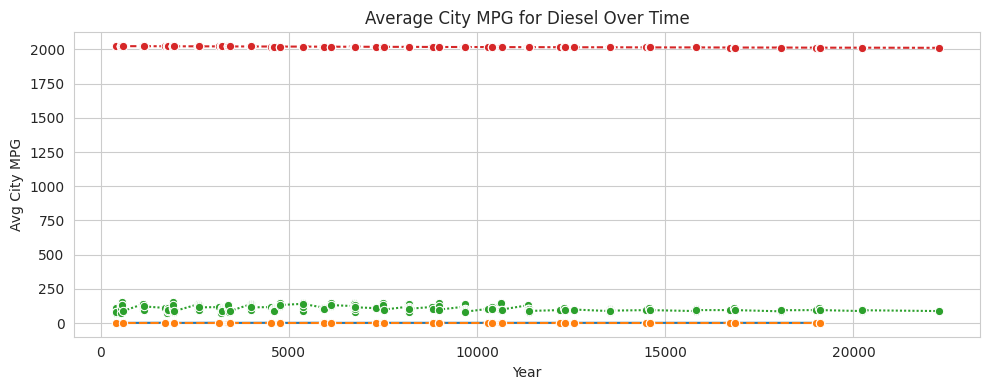

In [53]:
# Set the style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=sorted_electric_vehicles, marker='o', legend=False)

# Set the title and labels
plt.title('Average City MPG for Diesel Over Time')
plt.xlabel('Year')
plt.ylabel('Avg City MPG')

# Tilt the x-axis labels
# plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
categorical_features = ["Trans", 
                        "Drive", 
                        "Fuel",
                        "Veh Class",
                        "Car_Make", 
                        "Car_Model",
                        "Air Pollution Score",
                        "Greenhouse Gas Score"]

numerical_features = ["Displ",                       
                      "Year",
                      "Cyl",
                      "Displ"]

In [48]:
# Define features and target
X = merged_data.drop(columns=['City MPG', 'Hwy MPG', 'Cmb MPG'])
y = merged_data['City MPG']

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from joblib import dump, load

In [50]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [51]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']